In [1]:
# Database for measurements of the second coefficient of the virial equation of state 
# for several species of combustion interest. Most data have been obtained from the 
# compilations by Dymond and Smith (1980) and Dymond et al. (2002), and span the last
# century. This electronic Python notebook version of the database has been assembled
# by Daniel I. Pineda, and exports all of the data into separate files for each 
# species with tab-delimited temperature, coefficient, and uncertainty information. 
# Only the second virial coefficient is considered here. 

# SPECIES IN THIS DATABASE
# So far, the following species have sufficient (but likely incomplete) virial coefficient
# data in this database:
# CH4 (methane)
# O2 (oxygen) (more data needed)
# N2 (nitrogen)
# H2 (hydrogen) (more data needed)
# CO (carbon monoxide) (more data needed)
# Ar (argon)
# HCN (hydrogen cyanide) (more data needed, but not a critical species)
# CH3OH (methanol) (more data needed)
# CO2 (carbon dioxide)
# H2O (water) (more data needed)
# C2H6 (ethane)
# C2H2 (acetylene) (more data needed)
# C2H5OH (ethanol) (more data needed)
# C2H4 (ethylene / ethene)
# 
# The following species are immediately forthcoming or in progress:
# C3H8 (propane)
# NO (nitric oxide)
# N2O (nitrous oxide)
#
# The following species are on the radar but typically flame simulations including these
# species are very expensive and so the usefulness of the data may be limited:
# C6H6 (benzene)
# C6H5CH3 (toluene)
# iC8H18 (iso-octane)
# nC7H16 (n-heptane)

# Headers for Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# FUNCTIONS NEEDED IN THIS DATABASE
def BerrCalc(Bvalues, DataQuality):
    # determine the error class as defined by Dymond & Smith, 1980
    # class I: estimated precision < 2% or < 1 cm^3 mol^-1, whichever is greater
    # class II: estimated precision < 10% or < 15 cm^3 mol^-1, whichever is greater
    # class III: estimated precision > 10% or > 15 cm^3 mol^-1, whichever is greater
    if (DataQuality == 1):
        percentError = 0.02;
        cm3mol1Error = 1;
    elif (DataQuality == 2):
        percentError = 0.10;
        cm3mol1Error = 15;
    elif (DataQuality == 3):
        percentError = 0.20;
        cm3mol1Error = 30;
    # initialize B error vector
    BerrReturn = np.zeros(len(Bvalues));
    
    # determine the error and assign it to the vector, element by element
    for ii in range(len(Bvalues)):
        percentEstimate = abs(Bvalues[ii])*percentError;
        cm3mol1Estimate = cm3mol1Error;
        BerrReturn[ii] = max(percentEstimate, cm3mol1Estimate);
    return BerrReturn

def Bcalc(T, sigma, epsilon, mu, calcMethod):
    # Calculate the second coefficient of the virial equation of state using
    # Lennard Jones / Stockmayer parameters
    # T in Kelvin, sigma in Angstroms, epsilon in Kelvin, mu in Debyes
    # Only one method (calcMethod = "Inf") works with confidence right now, and
    # that method involves a full integration of the intermolecular potential 
    
    # basic definitions needed in this function
    N_A = 6.022140E23 # Avagadro's number
    k_B = 1.38064852E-23 # Boltzmann constant
    epsilon_0 = 8.8541878176E-12 # permittivity of free space 
    pi = np.pi # pi
    
    if (calcMethod == "Inf"):
        # use the full integration of the potential to infinity (or in this case 100 angstroms)
        # This can apply to either a Lennard-Jones fluid or a Stockmayer fluid
        # However, using the Stockmayer expression with a permanent dipole results in erraneously low values of 
        # B, so for now, mu = 0.0
        # 
        # Set up a grid from 0 to 100 Angstroms
        radius = np.linspace(0.0001, 100.0001, 10000)
        # non-dimensionalize the grid by the collision diameter, sigma
        r_star = np.array(radius/sigma)
        # nondimensionalize the dipole moment by the well depth and collision diameter
        # take the maximum value of the nondimensional dipole moment, defined by Kee (pp 496, 2003)
        # the electric constant must be in here to be truly nondimensional, but then disagrees with tabulated results 
        # The 1.0E-18 is to convert to statC, the 1.0E7 is convert to ergs, and the 1.0E-8 is to convert to cm 
        delta_max = (((mu*1.0E-18)**2.0))/(2.0*epsilon*k_B*(1.0E7)*((sigma*1.0E-8)**3.0))
        constantConvert = 1.0/(4*pi*epsilon_0*8.998E9) # divide delta_max by this number to convert for statC
        # as a sanity check, this should give something close to unity 

        # create the integral 
        integral_expression = np.array((r_star**2.0)*(np.exp(-4.0*(r_star**(-12.0) - r_star**(-6.0) - (delta_max*constantConvert)*(r_star**(-3.0)))*(epsilon/T)) -1))
        B_result = 0.6022140*(-2.0*pi*(sigma**3.0))*np.trapz(integral_expression, x=r_star)
    return B_result

# to do: function that determines virial coefficient from PVT data...?

In [2]:
# Enter data for methane, CH4

# original index in compilation: 3
speciesName = ["CH4"]
dataRef = ["F.A. Freeth and T.T.H. Verschoyle, Proc. R. Soc. A130 453 (1931)"]
dataRefID = ["10.1098/rspa.1931.0016"]
# 4-term fit of PV data at 293.15 K, 
dataClass = ["class I"]
dataT = [np.array([273.15, 293.15])]
dataB = [np.array([-53.91, -48.68])]
dataBerr = [BerrCalc(dataB[0], 1)]

# original index in compilation: 4
speciesName.append("CH4")
dataRef.append("A. Michels and G.W. Nederbragt, Physica 2 1000 (1935)")
dataRefID.append("10.1016/S0031-8914(35)90186-0")
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-54.07, -43.38, -34.72, -27.87, -21.74, -16.09, -11.46]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 5
speciesName.append("CH4")
dataRef.append("A. Michels and G.W. Nederbragt, Physica 3 569 (1936)")
dataRefID.append("10.1016/S0031-8914(36)80363-2")
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-53.86, -43.34, -34.62, -27.73, -21.58, -16.36, -11.62]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 6
speciesName.append("CH4")
dataRef.append("J.A. Beattie and W.H. Stockmayer, J. chem Phys. 10 473 (1942)")
dataRefID.append("10.1063/1.1723750")
dataClass.append("class I")
dataT.append(np.array([423.15, 448.15, 473.15, 498.15, 523.15, 548.15, 573.15]))
dataB.append(np.array([-11.4, -7.5, -4.0, -0.9, 1.9, 4.5, 6.8]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 8
speciesName.append("CH4")
dataRef.append("Eizo Kanda, Sc. Rep. Res. Insts Tohoku Univ. Ser. A1 157 (1949)")
dataRefID.append("http://ci.nii.ac.jp/naid/110004636624/")
# values of B taken from Chem. Abstr. 45 5993b (1951). Calculated by the
# author from other thermodynamic measurements
dataClass.append("class II")
dataT.append(np.array([150, 200, 250, 300, 350, 400, 450]))
dataB.append(np.array([-169.1, -100.1, -63.14, -43.32, -26.80, -15.33, -3.91]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in compilation: 9

speciesName.append("CH4")
dataRef.append("S.D. Hamann, J.A. Lambert, and R.B. Thomas, Aust. J. Chem. 8 149 (1955)")
dataRefID.append("10.1071/CH9550149")
dataClass.append("class I")
dataT.append(np.array([303.15, 323.15, 333.15, 343.15, 363.15, 383.15]))
dataB.append(np.array([-38.2, -35.2, -33.9, -28.5, -22.7, -19.7]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 10a
speciesName.append("CH4")
dataRef.append("H.W. Schamp, Jr., E.A. Mason, A.C.B. Richardson, and A. Altman, Physics Fluids 1 329 (1958)")
dataRefID.append("10.1063/1.1705891")
dataClass.append("class I")
# 3 term fit of PV data
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-53.43, -43.03, -34.42, -27.29, -21.26, -15.99, -11.41]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 10b
speciesName.append("CH4")
dataRef.append("H.W. Schamp, Jr., E.A. Mason, A.C.B. Richardson, and A. Altman, Physics Fluids 1 329 (1958)")
dataRefID.append("10.1063/1.1705891")
dataClass.append("class I")
# 4 term fit of PV data
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-53.62, -43.26, -34.58, -27.45, -21.26, -15.93, -11.24]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 11
speciesName.append("CH4")
dataRef.append("G. Thomes and R. van Steenwinkel, Nature, Lond. 187 229 (1960)")
dataRefID.append("10.1038/187229a0")
dataClass.append("class II")
dataT.append(np.array([108.45, 108.45, 125.2, 125.2, 149.1, 149.1, 186.4, 186.4, 223.6, 223.6, 249.3, 249.3]))
dataB.append(np.array([-364.99, -361.54, -267.97, -268.92, -188.04, -187.64, -126.10, -126.20, \
    -82.62, -82.69, -68.53, -68.38]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in compilation: 12
speciesName.append("CH4")
dataRef.append("J.A. Huff and T.M. Reed, J. chem. Engng Data 8 306 (1963)")
dataRefID.append("10.1021/je60018a010")
# Values of B originally given by R.D. Gunn, M.S. Thesis, University of California (Berkeley) (1958)
dataClass.append("class I")
dataT.append(np.array([273.2, 444.3, 447.6, 510.9]))
dataB.append(np.array([-54.1, -8.1, -3.6, 0.0]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 13
speciesName.append("CH4")
dataRef.append("W.H. Mueller, T.W. Leland, Jr., and R. Kobayashi, AIChE. J. 7 267 (1961)")
dataRefID.append("10.1002/aic.690070220")
dataClass.append("N/A")
dataT.append(np.array([144.28, 172.05, 199.83, 227.60, 255.38, 283.16]))
dataB.append(np.array([-221.0, -153.5, -107.8, -81.7, -63.3, -49.1]))
dataBerr.append(np.array([2, 1, 2, 1, 1, 2]))

# original index in compilation: 15
speciesName.append("CH4")
dataRef.append("D.R. Douslin, R.H. Harrison, R.T. Moore, and J.P. McCullough, J. chem. Engng Data 9 358 (1964)")
dataRefID.append("10.1021/j100870a021")
# Errors in B less than 0.2
# These values are quoted by D.R. Douslin, Progress in international
# research in thermodynamic and transport properties, ASME, (1962) p 135,
# where a short discussion of errors is given 
dataClass.append("N/A")
dataT.append(np.array([273.15, 298.15, 303.15, 323.15, 348.15, 373.15, 398.15, 423.15, 448.15, 473.15, \
    498.15, 523.15, 548.15, 573.15, 598.15, 623.15]))
dataB.append(np.array([-53.35, -42.82, -40.91, -34.23, -27.06, -21.00, -15.87, -11.40, -7.56, -4.16, \
    -1.16, 1.49, 3.89, 5.98, 7.88, 9.66]))
dataBerr.append(np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]))

# original index in compilation: 17
speciesName.append("CH4")
dataRef.append("A.E. Hoover, I. Nagata, T.W. Leland, Jr., and R. Kobayashi, J. chem. phys. 48 2633 (1968)")
dataRefID.append("10.1063/1.1669494")
dataClass.append("N/A")
dataT.append(np.array([131.93, 191.06, 200.00, 215.00, 240.00, 273.15]))
dataB.append(np.array([-224, -116.31, -106.12, -92.59, -72.72, -53.28]))
dataBerr.append(np.multiply(np.array([0.09, 0.01, 0.01, 0.004, 0.003, 0.002]), -1.*dataB[-1]))

# original index in compilation: 18
speciesName.append("CH4")
dataRef.append("M.A. Byrne, M.R. Jones, and L.A.K. Staveley, Trans. Faraday Soc. 64 1747 (1968)")
dataRefID.append("10.1039/TF9686401747")
dataClass.append("class I")
dataT.append(np.array([110.83, 112.43, 114.45, 116.79, 121.25, 128.84, 136.75, 148.28, 162.29, 178.41, \
    202.49, 221.10, 243.80, 273.17]))
dataB.append(np.array([-330.1, -319.9, -307.8, -295.5, -274.5, -244.3, -218.9, -187.7, -158.4, -132.2, \
    -103.4, -85.8, -70.3, -53.7]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 19
speciesName.append("CH4")
dataRef.append("R.N. Lichtenthaler and K. Schafer, Ber. (dtsch.) Bunsenges. phys. Chem. 73 42 (1969)")
dataRefID.append("10.1002/bbpc.19690730110")
# estimated absolute error in B +/- 1
dataClass.append("N/A")
dataT.append(np.array([288.2, 296.0, 303.2, 313.2, 323.1]))
dataB.append(np.array([-46.20, -43.13, -40.40, -37.00, -33.80]))
dataBerr.append(np.array([1, 1, 1, 1, 1]))

# original index in compilation: 22a
speciesName.append("CH4")
dataRef.append("R.C. Lee and W.C. Edminster, AIChE. J. 16 1047 (1970)")
dataRefID.append("10.1002/aic.690160631")
dataClass.append("N/A")
# slope intercept calculations
dataT.append(np.array([298.15, 323.15, 348.15]))
dataB.append(np.array([-42.88, -33.22, -26.54]))
dataBerr.append(np.array([1.5, 1.0, 1.1]))

# original index in compilation: 22b
speciesName.append("CH4")
dataRef.append("R.C. Lee and W.C. Edminster, AIChE. J. 16 1047 (1970)")
dataRefID.append("10.1002/aic.690160631")
dataClass.append("N/A")
# curve fit
dataT.append(np.array([298.15, 323.15, 348.15]))
dataB.append(np.array([-42.70, -33.46, -25.69]))
dataBerr.append(np.array([2.3, 0.3, 0.9]))

# original index in compilation: 24
speciesName.append("CH4")
dataRef.append("K. Strein, R.N. Lichtenthaler, B. Schramm, and Kl. Schafer, Ber. (dtsch.) Bunsenges. phys. Chem. 75 1308 (1971)")
dataRefID.append("10.1002/bbpc.197100009")
dataClass.append("N/A")
# estimated accuracy of +/- 1
dataT.append(np.array([296.1, 308.0, 333.5, 353.8, 374.0, 393.9, 413.8, 434.0, 453.4, 473.5, 493.0, 511.1]))
dataB.append(np.array([-44.5, -39.5, -29.8, -23.8, -19.4, -15.4, -11.5, -8.0, -5.0, -3.0, -1.0, 0.5]))
dataBerr.append(np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

# original index in compilation: 25
speciesName.append("CH4")
dataRef.append("T.K. Bose, J.S. Sochanski, and R.H. Cole, J. chem. Phys. 57 3592 (1972)")
dataRefID.append("10.1063/1.1678813")
dataClass.append("N/A")
# B derived from low pressure dielectric measurements
dataT.append(np.array([279.8, 322.5, 373.4]))
dataB.append(np.array([-52.9, -35.8, -21.8]))
dataBerr.append(np.array([1.4, 2.3, 1.0]))

# original index in compilation: 26
speciesName.append("CH4")
dataRef.append("D.R. Roe, PhD thesis, University of London (1972)")
dataRefID.append("N/A")
dataClass.append("N/A")
dataT.append(np.array([155.89, 167.67, 181.86, 192.64, 204.61, 218.87, 234.05, 248.54, 263.08, 291.41]))
dataB.append(np.array([-167.95, -146.55, -125.70, -112.85, -100.15, -87.15, -75.90, -66.50, -58.35, -45.50]))
dataBerr.append(np.array([0.60, 0.40, 0.40, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20]))

# original index in compilation: 27
speciesName.append("CH4")
dataRef.append("G.A. Pope, P.S. Chappelear and R. Kobayashi, J. chem. Phys. 59 423 (1973)")
dataRefID.append("10.1063/1.1679822")
# burnett method
dataClass.append("N/A")
dataT.append(np.array([126.584, 135.994, 147.583, 158.909, 173.485, 191.097]))
dataB.append(np.array([-242.27, -215.20, -185.00, -161.51, -137.63, -114.29]))
dataBerr.append(np.array([0.72, 0.12, 0.94, 0.23, 0.15, 0.25]))

# original index in compilation: 28
speciesName.append("CH4")
dataRef.append("J. Bellm, W. Reineke, K. Schafer, and B. Schramm, Ber. (dtsch.) Bunsenges. phys. Chem. 78 282 (1974)")
dataRefID.append("10.1002/bbpc.19740780312")
# estimated accuracy is +/- 2
dataClass.append("N/A")
dataT.append(np.array([300, 320, 340, 370, 400, 430, 460, 490, 520, 550]))
dataB.append(np.array([-42.8, -35.2, -28.9, -21.3, -15.0, -9.6, -5.3, -2.0, 0.6, 2.5]))
dataBerr.append(np.array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

# original index in compilation: 29
speciesName.append("CH4")
dataRef.append("R. Hahn, K. Schafer, and B. Schramm, Ber. (dtsch.) Bunsenges. phys. Chem. 78 287 (1974)")
dataRefID.append("10.1002/bbpc.19740780313")
# B dtermined using B (296 K) = -44.5
# quoted accuracy is +/-2 
dataClass.append("N/A")
dataT.append(np.array([200.5, 231.2, 251.5, 273.0]))
dataB.append(np.array([-106, -79.6, -65.2, -54.7]))
dataBerr.append(np.array([2, 2, 2, 2]))

# New data from 2002 compilation begin here

# original index in 2002 compilation: 92-hae/kle
speciesName.append("CH4")
dataRef.append("Haendel, G.; Kleinrahm, R.; Wagner, W.; J. Chem. Thermodyn. 24 (1992) 685")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([160, 180, 186, 189, 190.55, 193, 196, 200, 207, 220, \
    240, 260]))
dataB.append(np.array([-160.37, -128.45, -120.61, -116.93, -115.08, -112.26, -108.91, -104.66, -97.71, -86.30, \
    -71.76, -59.98]))
dataBerr.append(np.array([0.50, 0.30, 0.30, 0.30, 0.30, 0.30, 0.30, 0.30, 0.30, 0.30, \
    0.30, 0.30]))

# original index in 2002 compilation: 94-tru
speciesName.append("CH4")
dataRef.append("Trusler, J. P. M.; J. Chem. Thermodyn. 26 (1994) 751")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([200, 225, 240, 250, 275, 300, 325, 350, 375]))
dataB.append(np.array([-104.7, -82.20, -71.60, -65.40, -52.40, -41.90, -33.40, -26.40, -20.40]))
dataBerr.append(np.array([0.30, 0.30, 0.28, 0.25, 0.20, 0.20, 0.15, 0.10, 0.10]))

# original index in 2002 compilation: 88-mic/sch
speciesName.append("CH4")
dataRef.append("Michels, J. P. J.; Schouten, J. A.; Jaeschke, M.; Int. J. Thermophys. 9 (1988) 985")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([273.0, 273.0, 298.0, 298.0]))
dataB.append(np.array([-53.37, -53.41, -42.77, -42.88]))
dataBerr.append(np.array([0.80, 0.80, 0.80, 0.80]))

# original index in 2002 compilation: 79-tra/was
speciesName.append("CH4")
dataRef.append("Trappeniers, N. J.; Wassenaar, T.; Abels, J. C.; Physica A: (Amsterdam). 98 (1979) 289")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([273.15, 285.65, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-53.20, -47.58, -42.60, -33.90, -26.70, -20.70, -15.50, -11.10]))
dataBerr.append(np.array([1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]))

# original index in 2002 compilation: 70-hol
speciesName.append("CH4")
dataRef.append("Holleran, E. M.; J. Chem. Thermodyn. 2 (1970) 779")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([298.15, 323.15, 348.15, 373.16, 398.17, 423.18, 473.21, 498.23, \
    523.25, 548.26, 573.15, 598.29, 623.30, 648.31, 673.31]))
dataB.append(np.array([-42.87, -34.26, -27.11, -21.10, -15.97, -11.54, -4.31, -1.31, \
    1.36, 3.75, 5.90, 7.86, 9.64, 11.25, 12.75]))
dataBerr.append(np.array([0.10, 0.10, 0.08, 0.08, 0.08, 0.10, 0.15, 0.15, 0.15, 0.15, \
    0.10, 0.10, 0.08, 0.08, 0.08]))

# original index in 2002 compilation: 96-hou/hol
speciesName.append("CH4")
dataRef.append("Hou, H.; Holste, J. C.; Hall, K. R.; Marsh, K. N.; Gammon, B. E.; J. Chem. Eng. Data. 41 (1996) 344")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([300, 320]))
dataB.append(np.array([-42.43, -35.32]))
dataBerr.append(np.array([0.01, 0.02]))

In [3]:
# Enter data for oxygen, O2

# original index in compilation: 1
speciesName.append("O2")
dataRef.append("H.A. Kuypers and H. Kamerlingh Onnes, Archs neerl. Sci. 6 227 (1923)")
dataRefID.append("N/A")
# % 3-term fit of PV data 
dataClass.append("class I")
dataT.append(np.array([273.15, 293.15]))
dataB.append(np.array([-21.43, -16.76]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 2
speciesName.append("O2")
dataRef.append("L. Holborn and J. Otto, Z. Phys. 33 1 (1925)(*)")
dataRefID.append("10.1007/BF01328287")
# 5-term fit of PV data
dataClass.append("class I")
dataT.append(np.array([273.15, 323.15, 373.15]))
dataB.append(np.array([-22.14, -10.81, -3.46]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 3
speciesName.append("O2")
dataRef.append("G.P. Nijhoff and W.H. Keesom, Communs phys. lab. Univ. Leiden 179b (1925)")
dataRefID.append("http://www.dwc.knaw.nl/DL/publications/PU00015241.pdf")
dataClass.append("class II")
dataT.append(np.array([120.60, 127.77, 137.87, 148.21, 154.58, 156.15, 157.15, 159.22, 163.17, 170.67, \
    193.16, 233.15]))
dataB.append(np.array([-134.83, -121.76, -104.42, -90.40, -82.65, -81.38, -79.77, -78.24, -73.72, \
    -67.51, -51.23, -32.98]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in compilation: 4
speciesName.append("O2")
dataRef.append("G.A. Bottemley, D.S. Massie, and R. Whytlaw-Gray, Proc. R. Soc. A200 201 (1950)")
dataRefID.append("10.1098/rspa.1950.0012")
dataClass.append("class II")
dataT.append(np.array([295.21]))
dataB.append(np.array([-15.5]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in compilation: 5
speciesName.append("O2")
dataRef.append("D. White, J.-H. Hu, and H.L. Johnston, J. chem Phys. 21 1149 (1953)")
dataRefID.append("10.1063/1.1699153")
# values determined using a constant volume gas thermometer 
dataClass.append("class II")
dataT.append(np.array([80, 90, 100, 125, 150, 175, 200, 250]))
dataB.append(np.array([-339, -237, -170, -112, -94, -62, -42, -35]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in compilation: 6a
speciesName.append("O2")
dataRef.append("A. Michels, H.W. Schamp, and W. de Graaff, Physica. 20 1209 (1954)")
dataRefID.append("10.1016/S0031-8914(54)80265-5")
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15]))
dataB.append(np.array([-21.89, -16.24, -11.62]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 6b
speciesName.append("O2")
dataRef.append("A. Michels, H.W. Schamp, and W. de Graaff, Physica. 20 1209 (1954)")
dataRefID.append("10.1016/S0031-8914(54)80265-5")
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15]))
dataB.append(np.array([-21.80, -16.50, -11.91]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 7
speciesName.append("O2")
dataRef.append("T.L. Cottrell, R.A. Hamilton, and R.P. Taubinger, Trans. Faraday Soc. 52 1310 (1956)")
dataRefID.append("10.1039/TF9565201310")
dataClass.append("N/A")
dataT.append(np.array([303, 333, 363]))
dataB.append(np.array([-16.6, -7.3, -2.5]))
dataBerr.append(np.array([5.1, 2.0, 2.3]))

# original index in compilation: 8
speciesName.append("O2")
dataRef.append("R.A.H. Pool, G. Saville, T.M. Herrington, B.D.C. Shields, L.A.K. Staveley, Trans. Faraday Soc. 58 1692 (1962)")
dataRefID.append("10.1039/TF9625801692")
dataClass.append("N/A")
dataT.append(np.array([90]))
dataB.append(np.array([-245]))
dataBerr.append(np.array([2]))

# original index in compilation: 9
speciesName.append("O2")
dataRef.append("L.A. Weber, J. Res. natn. Bur. Stand. 74A 93 (1970)")
dataRefID.append("https://ntrs.nasa.gov/search.jsp?R=19700046840")
# 3-term fit of PV data at densities up to 0.006709 mol cm^-3
dataClass.append("N/A")
dataT.append(np.array([85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, \
    140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, \
    210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, \
    280, 285, 290, 295, 300]))
dataB.append(np.array([-267.78, -240.67, -217.51, -197.54, -180.20, -165.05, \
    -151.71, -139.91, -129.41, -120.02, -111.59, -103.98, -97.08, -90.81, \
    -85.09, -79.84, -75.02, -70.58, -66.48, -62.67, -59.14, -55.85, -52.77, \
    -49.89, -47.20, -44.66, -42.27, -40.02, -37.90, -35.89, -33.98, -32.17, \
    -30.45, -28.81, -27.25, -25.77, -24.34, -22.98, -21.68, -20.44, -19.24, \
    -18.09, -16.98, -15.92]))
dataBerr.append(np.array([30, 30, 30, 15, 15, 15, 15, 5, 5, 5, 5, 1, 1, 0.25, \
    0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.3, 0.3, 0.3, 0.3, \
    0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, \
    0.3, 0.3]))

# New data from 2002 compilation begin here

# original index in 2002 compilation: 86-eli/hoa
speciesName.append("O2")
dataRef.append("Elias, E.; Hoang, N.; Sommer, J.; Schramm, B.; Ber. Bunsen-Ges. Phys. Chem. 90 (1986) 342")
dataRefID.append("10.1002/bbpc.19860900406")
dataClass.append("N/A")
dataT.append(np.array([77.30, 87.20, 90.10]))
dataB.append(np.array([-338.0, -253.0, -239.0]))
dataBerr.append(np.array([6, 5, 5]))

# original index in 2002 compilation: 84-wag/ewe
speciesName.append("O2")
dataRef.append("Wagner, W.; Ewers, J.; Schmidt, R.; Cryogenics. 24 (1984) 37.")
dataRefID.append("10.1016/0011-2275(84)90056-0")
dataClass.append("N/A")
dataT.append(np.array([80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, \
    210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 320, 340, 360, 380, 400, 420, \
    440, 460, 480, 500]))
dataB.append(np.array([-269.0, -217.6, -183.8, -157.5, -136.1, -118.2, -103.3, -90.6, \
    -79.8, -70.6, -62.7, -55.9, -49.9, -44.6, -39.9, -35.8, -32.1, -28.7, -25.7, \
    -22.9, -20.4, -18.1, -15.9, -12.1, -8.7, -5.8, -3.1, -0.7, 1.5, 3.4, 5.3, 7.0, 8.6]))
dataBerr.append(np.array([20.0, 15.0, 10.0, 8.0, 4.0, 2.0, 1.0, 0.3, 0.3, 0.3, 0.3, 0.3, \
    0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, \
    0.3, 0.3, 0.3, 0.3]))

# original index in 2002 compilation: 88-fos/nat
speciesName.append("O2")
dataRef.append("Fostiropoulos, K.; Natour, G.; Sommer, J.; Schramm, B.; Ber. Bunsen-Ges. Phys. Chem. 92 (1988) 925")
dataRefID.append("10.1002/bbpc.198800221")
dataClass.append("N/A")
dataT.append(np.array([290, 296.20, 300, 303, 320, 353, 403, 455, 476]))
dataB.append(np.array([-17.3, -16.4, -15.5, -16.0, -12.0, -6.0, 0.2, 5.5, 6.6]))
dataBerr.append(np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]))

In [4]:
# Data entry for N2
# original index in compilation: 1
speciesName.append("N2")
dataRef.append("H. Kamerlingh Onnes and A.T. van Urk, Communs phys. Lab. Univ. Leiden 169d, e(1924)")
dataRefID.append("N/A")
dataClass.append("class I")
dataT.append(np.array([126.83, 128.69, 131.62, 141.88, 151.96, 170.90, 192.05, 222.89, 249.53, 273.15, 293.15]))
dataB.append(np.array([-101.8, -98.3, -94.5, -80.7, -69.83, -52.53, -39.12, -24.79, -16.73, -9.19, -5.48]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 2
speciesName.append("N2")
dataRef.append("L. Holborn and J. Otto, Z. Phys. 33 1 (1925)")
dataRefID.append("10.1007/BF01328287")
# 5-term fit of PV data
dataClass.append("class I")
dataT.append(np.array([143.15, 173.15, 223.15, 273.15, 323.15, 373.15, 423.15, 473.15, 573.15, 673.15]))
dataB.append(np.array([-79.79, -51.86, -26.38, -10.34, -0.26, 6.14, 11.53, 15.34, 20.64, 23.51]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 3
speciesName.append("N2")
dataRef.append("T.T.H. Verschoyle, Proc. R. Soc. A111 552 (1926)")
dataRefID.append("10.1098/rspa.1926.0081")
# 3-term fit of PV data
dataClass.append("class I")
dataT.append(np.array([273.15, 293.15]))
dataB.append(np.array([-11.11, -6.27]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 6
speciesName.append("N2")
dataRef.append("J. Otto, A. Michels, and H. Wouters, Phys. Z. 35 97 (1934)")
dataRefID.append("N/A")
# 6-term fit of PV data
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-10.14, -4.87, -0.50, 3.25, 6.23, 9.04, 11.37]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 7
speciesName.append("N2")
dataRef.append("A. Michels, H. Wouters, and J. de Boer, Physica,'s Grav. 1 587 (1934). (See also Physica,'s Grav. 3 585 (1936))")
dataRefID.append("10.1016/S0031-8914(34)80245-5")
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-10.27, -4.71, -0.28, 3.20, 6.56, 9.45, 12.29]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 10
speciesName.append("N2")
dataRef.append("A. Michels, R.J. Lunbeck, and G.J. Wolkers, Physica,'s Grav. 17 801 (1951)")
dataRefID.append("10.1016/0031-8914(51)90105-X")
# 8-term fit of PV data
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-10.05, -4.46, -0.25, 3.38, 6.50, 9.21, 11.51]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 11a
speciesName.append("N2")
dataRef.append("D. White, J.-H. Hu, and H.L. Johnston, J. chem. Phys. 21 1149 (1953)")
dataRefID.append("10.1063/1.1699153")
# values of B determined using constant volume gas thermometer
dataClass.append("class II")
dataT.append(np.array([80, 85, 90, 95, 100, 110, 125, 150, 175, 200, 250]))
dataB.append(np.array([-265, -247, -213, -174, -158, -142, -90, -56, -29, -34, -23]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in compilation: 11b
speciesName.append("N2")
dataRef.append("D. White, J.-H. Hu, and H.L. Johnston, J. chem. Phys. 21 1149 (1953)")
dataRefID.append("10.1063/1.1699153")
# the following obtained from gas density measurements, these results are considered more accurate
dataClass.append("class II")
dataT.append(np.array([80, 85, 90, 95, 100, 110, 125, 150, 175, 200, 250]))
dataB.append(np.array([-251, -223, -199, -178, -161, -134, -105, -71, -50, -35, -16]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in compilation: 12
speciesName.append("N2")
dataRef.append("W.C. Pfefferle, Jr., J.A. Goff, and J.G. Miller, J. chem Phys. 23 509 (1955)")
dataRefID.append("10.1063/1.1742020")
# burnett method
dataClass.append("N/A")
dataT.append(np.array([303.15, 303.15, 303.15]))
dataB.append(np.array([-4.17, -4.13, -4.17]))
dataBerr.append(np.array([0.06, 0.08, 0.04]))

# original index in compilation: 13
speciesName.append("N2")
dataRef.append("A. van Ittereek, H. Lambert, and G. Forres, Appl. scient. Res. 6A 15 (1956)")
dataRefID.append("10.1007/BF03184684")
# values of B calculated from velocity of sound measurements
dataClass.append("class II")
dataT.append(np.array([70, 80, 90, 100, 110, 120, 130, 140, 150]))
dataB.append(np.array([-306, -239, -193, -159, -134, -113, -97, -83, -72]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in compilation: 14
speciesName.append("N2")
dataRef.append("J.A. Huff and T.M. Reed, J. chem. Engng Data 8 306 (1963)")
dataRefID.append("10.1021/je60018a010")
# Values of B originally given by R.D. Gunn, M.S. Thesis, University of California (Berkeley) (1958)
dataClass.append("class I")
dataT.append(np.array([277.6, 298.2, 310.9, 323.2, 348.2, 373.2, 398.2, 427.6, 444.3, 460.9, 477.6, 510.9]))
dataB.append(np.array([-8.5, -4.84, -2.0, -0.52, 3.31, 6.19, 9.05, 11.6, 13.1, 14.2, 15.4, 17.4]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 15
speciesName.append("N2")
dataRef.append("R.A.H. Pool, G. Saville, T.M. Herrington, B.D.C. Shields, L.A.K. Staveley, Trans. Faraday Soc. 58 1692 (1962)")
dataRefID.append("10.1039/TF9625801692")
dataClass.append("N/A")
dataT.append(np.array([90]))
dataB.append(np.array([-201]))
dataBerr.append(np.array([2]))

# original index in compilation: 16
speciesName.append("N2")
dataRef.append("R.J. Witonzky and J.G. Miller, J. Am. chem. Soc. 85 282 (1963)")
dataRefID.append("10.1021/ja00886a007")
dataClass.append("class I")
dataT.append(np.array([448.15, 523.15, 598.15, 673.15, 748.15]))
dataB.append(np.array([14.26, 18.32, 20.80, 23.41, 24.73]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 17
speciesName.append("N2")
dataRef.append("F.B. Canfield, T.W. Leland, and R. Kobayashi, Adv. Cryogen. Engng 8 146 (1963)")
dataRefID.append("N/A")
# Burnett method
dataClass.append("class I")
dataT.append(np.array([133.15, 143.14, 158.15, 183.15, 223.13, 273.15]))
dataB.append(np.array([-91.95, -79.56, -63.50, -45.35, -25.17, -9.70]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 18
speciesName.append("N2")
dataRef.append("A.E. Hoover, F.B. Canfield, R. Kobayashi, and T.W. Leland, Jr., J. chem Engng Data 9 568 (1964)")
dataRefID.append("10.1021/je60023a030")
dataClass.append("class I")
dataT.append(np.array([273.15, 223.13, 183.15, 158.15, 143.14, 133.15]))
dataB.append(np.array([-10.56, -26.05, -45.15, -64.14, -76.59, -91.99]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 19
speciesName.append("N2")
dataRef.append("R.W. Crain, Jr. and R.E. Sonntag, Adv. cryogen. Engng 11 379 (1966)")
dataRefID.append("10.1007/978-1-4757-0522-5_42")
dataClass.append("class I")
dataT.append(np.array([143.15, 163.15, 203.15, 273.15]))
dataB.append(np.array([-79.45, -59.42, -33.85, -10.26]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 21
speciesName.append("N2")
dataRef.append("P.S. Ku and B.F. Dodge, J. chem Engng Data 12 158 (1967)")
dataRefID.append("10.1021/je60033a001")
# 3 term fit of PV data
dataClass.append("class I")
dataT.append(np.array([311.65, 373.15]))
dataB.append(np.array([-2.73, 5.97]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in compilation: 23
speciesName.append("N2")
dataRef.append("K.R. Hall and F.B. Canfield, Physica. 47 219 (1970)")
dataRefID.append("10.1016/0031-8914(70)90281-8")
# Burnett method
dataClass.append("class II")
dataT.append(np.array([103.15, 113.15]))
dataB.append(np.array([-148.46, -117.78]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in compilation: 25
speciesName.append("N2")
dataRef.append("D.R. Roe, PhD thesis, University of London (1972)")
dataRefID.append("N/A")
dataClass.append("N/A")
dataT.append(np.array([155.89, 181.86, 192.64, 204.61, 204.61, 218.87, 218.87, 234.05, 248.54, \
    248.54, 263.08, 276.94, 291.41]))
dataB.append(np.array([-65.95, -45.85, -39.60, -33.60, -33.50, -27.30, -27.30, -21.60, -17.00, \
    -16.90, -12.95, -9.40, -6.20]))
dataBerr.append(np.array([0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20]))

# original index in compilation: 26
speciesName.append("N2")
dataRef.append("G. Pocock and C.J. Wormald, J.C.S. Faraday I 71 705 (1975)")
dataRefID.append("10.1039/F19757100705")
# B values calculated from measured isothermal Joule-Thomsen coefficients
# errors in B estimated at 1% below 130 K, 1 above 130 K
dataClass.append("class I")
dataT.append(np.array([75, 80, 85, 90, 95, 100, 110, 120, 130, 140, 150, 175, 200, 225, 250, 275, \
    300, 350, 400, 450, 500, 600, 700]))
dataB.append(np.array([-302, -264, -233, -207, -187, -169, -140, -118, -100, -86.2, -74.3, -52.0, \
    -36.4, -25.0, -16.3, -9.6, -4.2, 3.8, 9.5, 13.6, 16.7, 21.2, 24.1]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# New data from 2002 compilation begin here

# original index in 2002 compilation: 92-ewi/tru-1
speciesName.append("N2")
dataRef.append("Ewing, M. B.; Trusler, J. P. M.; Physica A: (Amsterdam). 184 (1992) 415")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([75, 80, 90, 100, 110, 125, 150, 200, 250, 300, 400, 500, 600, 700]))
dataB.append(np.array([-276.1, -243.9, -195.0, -159.8, -133.3, -104.0, -71.5, -35.6, -16.3, -4.5, 9.2, 16.6, 21.1, 24.1]))
dataBerr.append(np.array([0.5, 0.5, 0.4, 0.3, 0.3, 0.4, 0.4, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]))

# original index in 2002 compilation: 79-sch/geh-1
speciesName.append("N2")
dataRef.append("Schramm, B.; Gehrmann, R.; J. Chem. Soc., Faraday Trans. 1. 75 (1979) 479")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([77.30, 87.20, 90.10]))
dataB.append(np.array([-278.0, -222.0, -204.0]))
dataBerr.append(np.array([7.0, 7.0, 7.0]))

# original index in 2002 compilation: 91-sch/eli
speciesName.append("N2")
dataRef.append("Schramm, B.; Elias, E.; Kern, L.; Natour, G.; Schmitt, A.; Weber, C.; Ber. Bunsen-Ges. Phys. Chem. 95 (1991) 615")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([77.30, 77.30, 77.30]))
dataB.append(np.array([-266.0, -265.0, -264.0]))
dataBerr.append(np.array([4.0, 4.0, 4.0]))

# original index in 2002 compilation: 80-sch/geh
speciesName.append("N2")
dataRef.append("Schmiedel, H.; Gehrmann, R.; Schramm, B.; Ber. Bunsen-Ges. Phys. Chem. 84 (1980) 721")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([213.0, 223.0, 242.0, 262.0, 276.0, 295.0, 330.0, 365.0, 400.0, 425.0, 450.0, 475.0]))
dataB.append(np.array([-29.5, -25.5, -19.0, -13.3, -9.8, -5.7, 0.4, 5.2, 9.0, 11.6, 13.4, 15.1]))
dataBerr.append(np.array([2.0, 2.0, 2.0, 2.0, 1.5, 1.5, 1.0, 1.5, 1.5, 2.0, 2.0, 2.0]))

# original index in 2002 compilation: 92-zha/sch
speciesName.append("N2")
dataRef.append("Zhang, W.; Schouten, J. A.; Hinze, H. M.; Jaeschke, M.; J. Chem. Eng. Data. 37 (1992) 114")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([269.3, 273.15, 290.0, 293.15, 310.0, 313.15, 323.15, 330.0, 350.0, 353.15]))
dataB.append(np.array([-11.2, -10.2, -6.5, -5.9, -2.7, -2.1, -0.4, 0.6, 3.6, 3.9]))
dataBerr.append(np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]))

# original index in 2002 compilation: 95-esp/lem
speciesName.append("N2")
dataRef.append("Esper, G.; Lemming, W.; Beckermann, W.; Kohler, F.; Fluid Phase Equilib. 105 (1995) 173")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([249.97, 269.83, 289.64, 310.23, 331.88, 350.81]))
dataB.append(np.array([-15.5, -10.3, -5.9, -2.1, 1.3, 3.9]))
dataBerr.append(np.array([2.0, 1.0, 0.6, 0.2, 0.1, 0.2]))

# original index in 2002 compilation: 91-bou/moo
speciesName.append("N2")
dataRef.append("Boushehri, A.; Moosavipour, S. H.; Iran. J. Chem. Eng. 10 (1991) 35")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([293.15, 313.15, 333.15]))
dataB.append(np.array([-6.0, -2.8, 3.0]))
dataBerr.append(np.array([0.4, 0.2, 0.2]))

# original index in 2002 compilation: 88-dus/kle
speciesName.append("N2")
dataRef.append("Duschek, W.; Kleinrahm, R.; Wagner, W.; Jaeschke, M.; J. Chem. Thermodyn. 20 (1988) 1069")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([273.15, 283.15, 293.15, 303.15, 313.15, 323.15]))
dataB.append(np.array([-10.3, -8.0, -5.9, -4.0, -2.2, -0.6]))
dataBerr.append(np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2]))

# original index in 2002 compilation: 89-bru/hwa
speciesName.append("N2")
dataRef.append("Brugge, H. B.; Hwang, C.-A.; Rogers, W. J.; Holste, J. C.; Hall, K. R.; Lemming, W.; Esper, G. J.; Marsh, K. N.; Gammon, B. E.; Physica A: (Amsterdam). 156 (1989) 382")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([300.0, 320.0]))
dataB.append(np.array([-4.5, -1.2]))
dataBerr.append(np.array([0.1, 0.1]))

# original index in 2002 compilation: 88-pat/jof
speciesName.append("N2")
dataRef.append("Patel, M. R.; Joffrion, L. L.; Eubank, P. T.; AIChE J. 34 (1988) 1229")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([103.15, 113.15, 303.15]))
dataB.append(np.array([-148.6, -118.5, -4.2]))
dataBerr.append(np.array([1.5, 1.5, 1.5]))

# original index in 2002 compilation: 58-bot/rem
speciesName.append("N2")
dataRef.append("Bottomley, G. A.; Remmington, T. A.; J. Chem. Soc. (1958) 3800")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([295.20, 308.20]))
dataB.append(np.array([-5.3, -2.9]))
dataBerr.append(np.array([0.1, 0.1]))
                      
# original index in 2002 compilation: 58-bro/raw
speciesName.append("N2")
dataRef.append("Brooks, G. L.; Raw, C. J. G.; Trans. Faraday Soc. 54 (1958) 972")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([303.20]))
dataB.append(np.array([-4.0]))
dataBerr.append(np.array([20]))

# original index in 2002 compilation: 57-kra/mil
speciesName.append("N2")
dataRef.append("Kramer, G. M.; Miller, J. G.; J. Phys. Chem. 61 (1957) 785")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([303.15]))
dataB.append(np.array([-3.5]))
dataBerr.append(np.array([0.3]))

# original index in 2002 compilation: 84-izu
speciesName.append("N2")
dataRef.append("Izuchi, M.; Keiryo Kenkyusho Hokoku. 33 (1984) 191")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([290.0, 300.0]))
dataB.append(np.array([-6.9, -4.9]))
dataBerr.append(np.array([0.1, 0.1]))

# original index in 2002 compilation: 91-lop/roz
speciesName.append("N2")
dataRef.append("Lopatinskii, E. S.; Rozhnov, M. S.; Zhdanov, V. I.; Parnovskii, S. L.; Kudrya, Y. N.; Zh. Fiz. Khim. 65 (1991) 2060")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([293.15, 293.15]))
dataB.append(np.array([-5.5, -5.4]))
dataBerr.append(np.array([3.3, 3.3]))

In [5]:
# H2 data input 

# original index in 1980 compilation: 1
speciesName.append("H2")
dataRef.append("H. Kamerlingh Onnes and C. Braak, Communs phys. Lab. Univ. Leiden 100a (1907)")
dataRefID.append("http://www.dwc.knaw.nl/DL/publications/PU00013658.pdf")
# comment
dataClass.append("class I")
dataT.append(np.array([55.74, 60.33, 68.45, 77.88, 90.34, 109.01, 133.27, 169.58]))
dataB.append(np.array([-26.95, -22.60, -15.50, -9.69, -5.39, 0.41, 5.14, 8.82]))
dataBerr.append(BerrCalc(dataB[-1], 1))

speciesName.append("H2")
dataRef.append("H. Kamerlingh Onnes and C. Braak, Communs phys. Lab. Univ. Leiden 100b (1907)")
dataRefID.append("http://www.dwc.knaw.nl/DL/publications/PU00013659.pdf")
# comment
dataClass.append("class I")
dataT.append(np.array([273.15, 373.15]))
dataB.append(np.array([13.02, 14.17]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 2
speciesName.append("H2")
dataRef.append("W.J. de Haas and H. Kamerlingh Onnes, Communs phys. Lab. Univ. Leiden 127c (1912)")
dataRefID.append("http://www.dwc.knaw.nl/DL/publications/PU00012986.pdf")
# comment 
dataClass.append("class II")
dataT.append(np.array([15.89, 17.69, 20.52]))
dataB.append(np.array([-244.9, -168.6, -143.0]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 3
speciesName.append("H2")
dataRef.append("L. Holborn, Annalen d. Phys. 63 674 (1920)")
dataRefID.append("10.1002/andp.19203682305")
# 3-term fit of PV data (P range 20 - 100 atm)
dataClass.append("class I")
dataT.append(np.array([273.15, 293.15, 323.15, 373.15]))
dataB.append(np.array([14.00, 14.47, 15.17, 15.58]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 4
speciesName.append("H2")
dataRef.append("L. Holborn, and J. Otto, Z. Phys. 33 1 (1925); 38 359 (1926)")
dataRefID.append("10.1007/BF01328287")
# 5-term fit of PV data (P series; terms in P^0, P^1, P^2, P^4, and P^6; max pressure 100 atm)
dataClass.append("class I")
dataT.append(np.array([65.25, 90.15, 123.15, 173.15, 223.15, 273.15, 323.15, 373.15, 473.15]))
dataB.append(np.array([-18.36, -5.54, 2.95, 9.16, 12.10, 14.00, 15.17, 15.58, 15.71]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 5
speciesName.append("H2")
dataRef.append("F.P.G.A.J. van Agt and H.K. Onnes, Communs phys. Lab. Univ. Leiden 176b (1925)")
dataRefID.append("http://www.dwc.knaw.nl/DL/publications/PU00015209.pdf")
dataClass.append("class II")
dataT.append(np.array([14.57, 15.71, 16.72, 18.23, 18.29, 20.60, 20.62, 69.93, 90.30]))
dataB.append(np.array([-245.6, -216.8, -194.0, -170.5, -170.1, -141.4, -140.2, -17.01, -8.16]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 6
speciesName.append("H2")
dataRef.append("T.T.H. Verschoyle, Proc. R. Soc. A111 552 (1926)")
dataRefID.append("10.1098/rspa.1926.0081")
# 3-term fit of PV data. Maximum pressure 210 atm
dataClass.append("class I")
dataT.append(np.array([273.15, 293.15]))
dataB.append(np.array([14.05, 14.59]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 7
speciesName.append("H2")
dataRef.append("C.W. Gibby, C.C. Tanner, and I. Masson, Proc. R. Soc. A122 283 (1928)")
dataRefID.append("10.1098/rspa.1929.0020")
# 2-term fit of PV data, maximum pressure 125 atm
dataClass.append("class I")
dataT.append(np.array([298.15, 323.15, 348.15, 373.53, 398.35, 423.25, 448.15]))
dataB.append(np.array([14.71, 15.05, 15.39, 15.54, 15.74, 15.54, 15.41]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 8
speciesName.append("H2")
dataRef.append("G.P. Nijhoff and W.H. Keesom, Communs phys. Lab. Univ. Leiden 188d (1928)")
dataRefID.append("http://www.dwc.knaw.nl/DL/publications/PU00015596.pdf")
dataClass.append("class II")
dataT.append(np.array([273.16, 293.16, 373.16]))
dataB.append(np.array([13.58, 14.16, 15.39]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 8
speciesName.append("H2")
dataRef.append("G.P. Nijhoff and W.H. Keesom, Communs phys. Lab. Univ. Leiden 188e (1928)")
dataRefID.append("http://www.dwc.knaw.nl/DL/publications/PU00015597.pdf")
dataClass.append("class II")
dataT.append(np.array([24.84, 31.82, 36.60, 41.64, 47.62]))
dataB.append(np.array([-108.62, -76.48, -57.05, -45.55, -34.54]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 10
speciesName.append("H2")
dataRef.append("G.A. Scott, Proc. R. Soc. A125 330 (1929)")
dataRefID.append("10.1098/rspa.1929.0171")
dataClass.append("class II")
# 3-term fit of PV data. Max press. 170 atm
dataT.append(np.array([298.15]))
dataB.append(np.array([14.60]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 11
speciesName.append("H2")
dataRef.append("C.C. Tanner and I. Masson, Proc. R. Soc A126 268 (1930)")
dataRefID.append("10.1098/rspa.1930.0007")
dataClass.append("class I")
# 2-term fit of PV data (3-term fit at 298 K). Max press 126 atm
dataT.append(np.array([298.15, 323.15, 348.15, 373.15, 398.15, 423.15, 447.15]))
dataB.append(np.array([14.71, 15.25, 15.45, 15.63, 15.81, 15.95, 15.92]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 13
speciesName.append("H2")
dataRef.append("D.T.A. Townend and L.A. Bhatt, Proc. R. Soc. A134 502 (1932)")
dataRefID.append("10.1098/rspa.1931.0210")
dataClass.append("class I")
# 4-term fit of PV data (P series). Max pressure 600 atm
dataT.append(np.array([273.15, 298.15]))
dataB.append(np.array([14.64, 13.65]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 14
speciesName.append("H2")
dataRef.append("E.A. Long and O.L.I. Brown, J. Am. chem. Soc. 59 1922 (1937)")
dataRefID.append("10.1021/ja01289a039")
dataClass.append("class II")
# double constant-volume gas thermometer
dataT.append(np.array([20.87, 24.11, 27.65, 32.43, 37.08, 41.64, 46.45]))
dataB.append(np.array([-136.5, -110.3, -90.2, -70.1, -56.0, -45.6, -37.2]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 16a
speciesName.append("H2")
dataRef.append("A. Michels and M. Goudeket, Physica. 8 347 (1941)")
dataRefID.append("10.1016/S0031-8914(41)90076-9")
dataClass.append("class I")
# (a) 3-term fit of PV data max pressure 50 atm
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([13.71, 13.81, 14.21, 14.76, 14.72, 14.94, 15.10]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 16b
speciesName.append("H2")
dataRef.append("A. Michels and M. Goudeket, Physica. 8 347 (1941)")
dataRefID.append("10.1016/S0031-8914(41)90076-9")
dataClass.append("class I")
# (b) 4-term fit of PV data. max press. 50 atm
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([13.50, 13.58, 13.86, 14.14, 14.52, 14.34, 14.50]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 16c
speciesName.append("H2")
dataRef.append("A. Michels and M. Goudeket, Physica. 8 347 (1941)")
dataRefID.append("10.1016/S0031-8914(41)90076-9")
dataClass.append("class I")
# (c) 3-term fit of PV data. max press 230 atm
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([13.81, 14.12, 14.55, 14.90, 15.16, 15.37, 15.59]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 20
speciesName.append("H2")
dataRef.append("T.L. Cottrell, R.A. Hamilton, and R.P. Taubinger, Trans. Faraday Soc. 52 1310 (1956)")
dataRefID.append("10.1039/TF9565201310")
dataClass.append("N/A")
# comment
dataT.append(np.array([303.2]))
dataB.append(np.array([14.1]))
dataBerr.append(np.array([1.7]))

# original index in 1980 compilation: 21
speciesName.append("H2")
dataRef.append("J.J.M. Beenakker, F.H. Varekamp, and A. Van Itterbeek, Physica 25 9 (1959)")
dataRefID.append("10.1016/S0031-8914(59)90626-3")
dataClass.append("N/A")
# comment
dataT.append(np.array([20.4]))
dataB.append(np.array([-152]))
dataBerr.append(np.array([1]))

# original index in 1980 compilation: 22
speciesName.append("H2")
dataRef.append("A. Michels, W. de Graff, T. Wassenaar, J.M.H. Levelt, and P. Louwerse, Physica. 25 25 (1959)")
dataRefID.append("10.1016/S0031-8914(59)90713-X")
dataClass.append("class I")
# PVT data 6-term fit in density series. P range 5 - 3000 atm
dataT.append(np.array([98.15, 103.15, 113.15, 123.15, 138.15, 153.15, 173.15, \
    198.15, 223.15, 248.15, 273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-2.99, -1.60, -0.80, 2.68, 5.03, 6.98, 8.93, 10.79, 12.05,\
    13.03, 13.74, 14.37, 14.92, 15.38, 15.67, 15.86, 16.08]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 23
speciesName.append("H2")
dataRef.append("F.H. Varekamp and J.J.M. Beenakker, Physica 25 889 (1959)")
dataRefID.append("10.1016/0031-8914(59)90010-2")
dataClass.append("class II")
# differential method - the non-ideality of the gas is comprared with that of helium
dataT.append(np.array([14, 15, 16, 17, 18, 19, 20, 21]))
dataB.append(np.array([-255, -232, -212, -196, -181, -168, -156, -146]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 24a
speciesName.append("H2")
dataRef.append("H.F.P. Knaap, M. Knoester, C.M. Knobler, and J.J.M. Beenakker, Physica. 28 21 (1962)")
dataRefID.append("10.1016/0031-8914(62)90088-5")
dataClass.append("class I")
# low pressure differential method
dataT.append(np.array([20.47, 20.53, 20.58, 34.46, 36.21, 39.17, 39.36]))
dataB.append(np.array([-151.3, -150.8, -150.2, -72.4, -67.2, -59.6, -59.4]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 24b
speciesName.append("H2")
dataRef.append("H.F.P. Knaap, M. Knoester, C.M. Knobler, and J.J.M. Beenakker, Physica. 28 21 (1962)")
dataRefID.append("10.1016/0031-8914(62)90088-5")
dataClass.append("class II")
# The authors adopt the value B = -149.7 at 20.4 K, and give the following recommended values for B 
dataT.append(np.array([14, 15, 16, 17, 18, 19, 20, 21, 25, 30, 35, 40, 45, 50, 55, 60, 65]))
dataB.append(np.array([-253, -229, -210, -193, -178, -165, -154, -144, -113, -85.8, -68.6, -55.6, -45.3, -37.2, -30.0, -23.7, -18.4]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 25
speciesName.append("H2")
dataRef.append("Z.E.H.A. El Hadi, J.A. Dorrepaal, and M. Durieux, Physica. 41 320 (1969)")
dataRefID.append("10.1016/0031-8914(69)90121-9")
dataClass.append("class II")
# comment 
dataT.append(np.array([19.26, 20.37, 21.40, 21.71, 22.19, 22.69, 23.26]))
dataB.append(np.array([-158.5, -145.3, -134.0, -131.2, -126.3, -121.7, -117.3]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 27
speciesName.append("H2")
dataRef.append("B. Schramm and H. Schmiedel (unpublished) (1979)")
dataRefID.append("N/A")
dataClass.append("N/A")
# comment
dataT.append(np.array([295, 350, 400, 450]))
dataB.append(np.array([14.5, 15.0, 15.3, 15.4]))
dataBerr.append(np.array([4, 4, 4, 4]))

# New data from 2002 compilation begin here

# original index in 2002 compilation: 91-lop/roz
speciesName.append("H2")
dataRef.append("Lopatinskii, E. S.; Rozhnov, M. S.; Zhdanov, V. I.; Parnovskii, S. L.; Kudrya, Y. N.; Zh. Fiz. Khim. 65 (1991) 2060")
dataRefID.append("TO DO")
dataClass.append("N/A")
# comment
dataT.append(np.array([293.15, 293.15]))
dataB.append(np.array([15.4, 15.4]))
dataBerr.append(np.array([21.0, 21.0]))

# original index in 2002 compilation: 91-sch/eli
speciesName.append("H2")
dataRef.append("Schramm, B.; Elias, E.; Kern, L.; Natour, G.; Schmitt, A.; Weber, C.; Ber. Bunsen-Ges. Phys. Chem. 95 (1991) 615")
dataRefID.append("TO DO")
dataClass.append("N/A")
# comment
dataT.append(np.array([296.15]))
dataB.append(np.array([14.1]))
dataBerr.append(np.array([0.5]))

# original index in 2002 compilation: 77-mih/sag
speciesName.append("H2")
dataRef.append("Mihara, S.; Sagara, H.; Arai, Y.; Saito, S.; J. Chem. Eng. Jpn. 10 (1977) 395")
dataRefID.append("TO DO")
dataClass.append("N/A")
# comment
dataT.append(np.array([298.15, 323.15, 348.15]))
dataB.append(np.array([14.2, 14.7, 15.3]))
dataBerr.append(np.array([0.5, 0.5, 0.5]))

# original index in 2002 compilation: 80-per/sch
speciesName.append("H2")
dataRef.append("Perez, S.; Schmiedel, H.; Schramm, B.; Z. Phys. Chem. (Munich). 123 (1980) 35")
dataRefID.append("TO DO")
dataClass.append("N/A")
# comment
dataT.append(np.array([300, 350, 400, 450, 500]))
dataB.append(np.array([14.3, 15.0, 15.4, 15.6, 15.6]))
dataBerr.append(np.array([2.0, 2.0, 2.0, 2.0, 2.0]))

In [6]:
# data for CO

# original index in 1980 compilation: 1
speciesName.append("CO")
dataRef.append("G.A. Scott, Proc. R. Soc. A125 330 (1929)")
dataRefID.append("10.1098/rspa.1929.0171")
# 3-term fit of PV data, max press 170 atm 
dataClass.append("class I")
dataT.append(np.array([298.15]))
dataB.append(np.array([-9.84]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 3
speciesName.append("CO")
dataRef.append("D.T.A. Townend and L.A. Bhatt, Proc. R. Soc. A134 502 (1932)")
dataRefID.append("10.1098/rspa.1931.0210")
# 4-term fit of PV data. Max press 600 atm
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15]))
dataB.append(np.array([-16.44, -9.98]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 4
speciesName.append("CO")
dataRef.append("G.A. Bottomley, D.S. Massie, and R. Whytlaw-Gray, Proc. R. Soc. A200 201 (1950)")
dataRefID.append("10.1098/rspa.1950.0012")
# comment
dataClass.append("class I")
dataT.append(np.array([295.21]))
dataB.append(np.array([-8.43]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 5a
speciesName.append("CO")
dataRef.append("A. Michels, J.M. Lupton, T. Wassenaar, and W. de Graaff, Physica. 18 121 (1952)")
dataRefID.append("10.1016/S0031-8914(52)80275-7")
# 3 term fit to PV data
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-14.19, -8.28, -3.40, 0.90, 4.49, 7.52, 10.04]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 5b
speciesName.append("CO")
dataRef.append("A. Michels, J.M. Lupton, T. Wassenaar, and W. de Graaff, Physica. 18 121 (1952)")
dataRefID.append("10.1016/S0031-8914(52)80275-7")
# 8 term fit to PV data
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-13.65, -7.95, -3.29, 1.06, 4.57, 7.67, 10.16]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 6
speciesName.append("CO")
dataRef.append("V. Mathot, L.A.K. Staveley, J.A. Young, and N.G. Parsonage, Trans. Faraday Soc. 52 1488 (1956)")
dataRefID.append("10.1063/1.1742360")
# comment
dataClass.append("N/A")
dataT.append(np.array([90.67]))
dataB.append(np.array([-233]))
dataBerr.append(np.array([5]))

# original index in 1980 compilation: 7
speciesName.append("CO")
dataRef.append("J.F. Connolly, Physics Fluids 7 1023 (1964)")
dataRefID.append("10.1063/1.1711317")
# comment
dataClass.append("class I")
dataT.append(np.array([323.2, 423.2, 473.2, 513.2, 573.2]))
dataB.append(np.array([-3.7, 9.6, 14.5, 17.3, 20.5]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 9
speciesName.append("CO")
dataRef.append("B. Schramm and H. Schmiedel (unpublished) (1979)")
dataRefID.append("N/A")
# Estimated eror in B is +/- 3
dataClass.append("N/A")
dataT.append(np.array([295, 330, 365, 400, 425, 450, 475]))
dataB.append(np.array([-9.0, -4.3, 0.3, 5.0, 7.5, 9.6, 11.0]))
dataBerr.append(np.array([3, 3, 3, 3, 3, 3, 3]))

# original index in 1980 compilation: 10
speciesName.append("CO")
dataRef.append("B. Schramm and R. Gehrmann (unpublished) (1979)")
dataRefID.append("N/A")
# comment
dataClass.append("N/A")
dataT.append(np.array([213, 223, 242, 262, 272, 295]))
dataB.append(np.array([-35.0, -30.5, -22.8, -16.5, -13.0, -9.0]))
dataBerr.append(np.array([6, 6, 6, 6, 6, 6]))

# New data from 2002 compilation begin here

# original index in 2002 compilation: 83-goo-1
speciesName.append("CO")
dataRef.append("Goodwin, R. D.; Cryogenics. 23 (1983) 403")
dataRefID.append("10.1016/0011-2275(83)90209-6")
# comment
dataClass.append("N/A")
dataT.append(np.array([120, 140, 160, 180, 200, 220, 240, 260, 280, 295, 300, 330, 400, 450]))
dataB.append(np.array([-127.8, -94.7, -71.5, -54.8, -42, -32.3, -24.3, -17.5, -12.0, -9.0, -7.2, -4.3, 5.0, 9.6]))
dataBerr.append(np.array([0.4, 0.5, 0.6, 0.7, 0.8, 0.2, 0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.6, 0.6]))

# need to dig up further references: 63-mul/kir-1, 80-sch/geh, 82-sch/mue, 83-goo-1(set- 2, set-3), 86-eli/hoa, 87-bar/cal, 91-bou/moo, 91-sch/eli, 96-vat/sch

In [7]:
# data for Ar

# original index in 1980 compilation: 1
speciesName.append("Ar")
dataRef.append("H. Kamerlingh Onnes and C.A. Crommelin, Communs phys. Lab. Univ. Leiden 188b (1910)")
dataRefID.append("TO DO")
# 6-term fit of PV data (V series; terms in V^0, V^-1, V^-2, V^-4, V^-6, V^-8). 
# (Values above 200 K are probably high)
# Maximum pressure 60 atm
dataClass.append("class I")
dataT.append(np.array([151.94, 152.91, 153.96, 156.53, 157.29, 159.35, 163.27, 170.64, 186.10, 215.43, 273.15, 293.54]))
dataB.append(np.array([-82.53, -82.17, -81.19, -79.01, -79.26, -75.70, -72.23, -65.09, -53.85, -37.03, -16.56, -12.55]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 2
speciesName.append("Ar")
dataRef.append("L. Holborn and J. Otto, Z. Phys. 33 1 (1925)")
dataRefID.append("TO DO")
# 5-term fit of PV data (P series; terms in P^0, P^1, P^2, P^4, P^6). 
# Maximum pressure 100 atm
dataClass.append("class I")
dataT.append(np.array([173.15, 223.15, 273.15, 323.15, 373.15, 423.15, 473.15, 573.15, 673.15]))
dataB.append(np.array([-64.32, -37.78, -22.08, -11.02, -4.29, 1.16, 4.67, 11.22, 15.29]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 3
speciesName.append("Ar")
dataRef.append("C.C. Tanner and I. Masson, Proc. R. Soc. A126 268 (1930)")
dataRefID.append("TO DO")
# 3-term fit of PV data (P series). 
# Maximum pressure 126 atm
dataClass.append("class I")
dataT.append(np.array([298.15, 323.15, 348.15, 373.15, 398.15, 423.15, 447.15]))
dataB.append(np.array([-16.35, -11.49, -7.48, -4.10, -0.72, 2.17, 3.72]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 4a
speciesName.append("Ar")
dataRef.append("A. Michels, Hub. Wijker, and Hk. Wijker, Physia, 15 627 (1949)")
dataRefID.append("TO DO")
# 7-term fit of PV data (P-> 2900 atm). 
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-21.13, -15.49, -11.06, -7.14, -3.89, -1.08, 1.42]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 4b
speciesName.append("Ar")
dataRef.append("A. Michels, Hub. Wijker, and Hk. Wijker, Physia, 15 627 (1949)")
dataRefID.append("TO DO")
# 3-term fit of PV data (P-> 80 atm). 
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-21.45, -15.76, -11.24, -7.25, -4.00, -1.18, 1.38]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 5
speciesName.append("Ar")
dataRef.append("E. Whalley, Y. Lupien, and W.G. Schneider, Can. J. Chem. 31 722 (1953)")
dataRefID.append("TO DO")
# 3-term fit of PV data (P series) up to 873.15 K, 2-term fit at higher T. Standard dev. 0.2 for B. 
dataClass.append("class I")
dataT.append(np.array([273.15, 323.15, 373.15, 423.15, 473.15, 573.15, 673.15, 773.15, 873.15]))
dataB.append(np.array([-22.41, -11.20, -4.34, 1.01, 5.28, 10.77, 15.74, 17.76, 19.48]))
dataBerr.append(np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]))

# original index in 1980 compilation: 6
speciesName.append("Ar")
dataRef.append("T.L. Cottrell, R.A. Hamilton, and R.P. Taubinger, Trans. Faraday Soc. 52 1310 (1956)")
dataRefID.append("TO DO")
# comment 
dataClass.append("class I")
dataT.append(np.array([303.2, 333.2, 363.2]))
dataB.append(np.array([-13.2, -9.3, -4.3]))
dataBerr.append(np.array([1.8, 1.3, 2.2]))

# original index in 1980 compilation: 7a
speciesName.append("Ar")
dataRef.append("A. Michels, J.M. Levelt, and W. de Graff, Physica, 24 659 (1958)")
dataRefID.append("TO DO")
# 7-term fit of PV data (P->1000 atm)
dataClass.append("class I")
dataT.append(np.array([248.15, 223.15, 203.15, 188.15, 173.15, 163.15]))
dataB.append(np.array([-28.25, -37.09, -45.99, -54.27, -64.24, -72.87]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 7b
speciesName.append("Ar")
dataRef.append("A. Michels, J.M. Levelt, and W. de Graff, Physica, 24 659 (1958)")
dataRefID.append("TO DO")
# 4-term fit of PV data (P->80 atm)
dataClass.append("class I")
dataT.append(np.array([150.65, 148.15]))
dataB.append(np.array([-85.58, -88.29]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 7c
speciesName.append("Ar")
dataRef.append("A. Michels, J.M. Levelt, and W. de Graff, Physica, 24 659 (1958)")
dataRefID.append("TO DO")
# 8-term fit of PV data (P->350 atm)
dataClass.append("class I")
dataT.append(np.array([153.15]))
dataB.append(np.array([-82.54]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 7d
speciesName.append("Ar")
dataRef.append("A. Michels, J.M. Levelt, and W. de Graff, Physica, 24 659 (1958)")
dataRefID.append("TO DO")
# 3-term fit of PV data (P->50 atm)
dataClass.append("class I")
dataT.append(np.array([248.15, 223.15, 203.15, 188.15, 173.15, 163.15, 153.15, 150.65, 148.15, 143.15, 138.15, 133.15]))
dataB.append(np.array([-28.57, -37.43, -46.52, -54.83, -65.21, -73.25, -82.97, -85.63, -88.45, -94.42, -100.88, -107.98]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 8
speciesName.append("Ar")
dataRef.append("A. Lecocq, J. Rech. Cent. Nat. Rech. Scient. 50 55 (1960)")
dataRefID.append("TO DO")
# 3-term fit to PV data 
dataClass.append("class I")
dataT.append(np.array([573.16, 673.16, 773.16, 923.16, 1073.16, 1223.16]))
dataB.append(np.array([9.79, 13.10, 16.01, 18.85, 19.93, 21.05]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 10
speciesName.append("Ar")
dataRef.append("R.A.H. Pool, G. Saville, T.M. Herrington, B.D.C. Shields, and L.A.K. Staveley, Trans. Faraday Soc. 58 1692 (1962)")
dataRefID.append("TO DO")
# comment 
dataClass.append("N/A")
dataT.append(np.array([90]))
dataB.append(np.array([-231]))
dataBerr.append(np.array([2]))

# original index in 1980 compilation: 11
speciesName.append("Ar")
dataRef.append("B.E.F. Fender and G.D. Halsey, Jr., J. chem. Phys. 36 1881 (1962)")
dataRefID.append("TO DO")
# 3-term fit of PV data (P less than 1 atm). Max err in B is +/- 1.5% 
dataClass.append("N/A")
dataT.append(np.array([84.79, 88.34, 92.30, 95.06, 101.40, 102.01, 105.51, 108.15, 113.32, 117.50, 123.99]))
dataB.append(np.array([-249.34, -229.89, -211.79, -200.87, -178.73, -177.65, -166.06, -160.27, -149.58, \
    -140.58, -127.99]))
dataBerr.append(0.015*abs(dataB[-1]))

# original index in 1980 compilation: 12
speciesName.append("Ar")
dataRef.append("J.H. Dymond and E.B. Smith (unpublished) (1962)")
dataRefID.append("N/A")
# estimated accuracy of B +/- 2
dataClass.append("N/A")
dataT.append(np.array([273.15, 298.15, 323.15]))
dataB.append(np.array([-23.1, -16.5, -10.9]))
dataBerr.append(np.array([2, 2, 2]))

# original index in 1980 compilation: 13
speciesName.append("Ar")
dataRef.append("R.W. Crain, Jr., and R.E. Sonntag, Adv. cryogen. Engng 11 379 (1966)")
dataRefID.append("TO DO")
# Burnett method; max. press. 500 atm
dataClass.append("class I")
dataT.append(np.array([143.15, 163.15, 203.15, 273.15]))
dataB.append(np.array([-94.69, -73.20, -46.35, -21.18]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 14
speciesName.append("Ar")
dataRef.append("R.D. Weir, I. Wynn Jones, J.S. Rowlinson, and G. Saville, Trans. Faraday Soc. 63 1320 (1967)")
dataRefID.append("TO DO")
# 3-term fit of PV data. Errors +/-10 at 80 K decreasing to +/-3 for T 82-85 K and +/-1 at high T
dataClass.append("N/A")
dataT.append(np.array([80.43, 81.95, 84.23, 87.12, 88.85, 92.78, 94.75, 97.65, 102.08, 105.89, 108.07, \
    120.0, 129.56, 144.60, 146.05, 157.41, 190.52]))
dataB.append(np.array([-285.1, -272.9, -268.5, -245.9, -235.9, -216.9, -207.3, -194.8, -179.1, -167.8, \
    -161.5, -134.3, -114.9, -93.18, -92.08, -80.34, -52.85]))
dataBerr.append(np.array([10, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

# original index in 1980 compilation: 15
speciesName.append("Ar")
dataRef.append("N.K. Kalfoglou and J.G. Miller, J. phys. Chem., Ithaca 71 1256 (1967)")
dataRefID.append("TO DO")
# comment
dataClass.append("class I")
dataT.append(np.array([303.2, 373.2, 473.2, 573.2, 673.2, 773.2]))
dataB.append(np.array([-15.05, -4.10, 5.05, 10.77, 14.25, 17.07]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 16
speciesName.append("Ar")
dataRef.append("M.A. Byrne, M.R. Jones, abd L.A.K. Staveley, Trans. Faraday Soc. 64 1747 (1968)")
dataRefID.append("TO DO")
# comment
dataClass.append("class I")
dataT.append(np.array([84.03, 85.96, 88.94, 89.57, 93.59, 97.69, 102.79, 107.93, 113.97, 122.38, 124.70, \
    130.96, 140.04, 159.72, 179.85, 209.94, 241.04, 271.39]))
dataB.append(np.array([-264.3, -250.2, -233.5, -228.2, -209.7, -193.6, -175.8, -161.1, -146.0, -127.3, \
    -123.5, -112.7, -99.1, -77.1, -60.7, -43.7, -30.9, -21.9]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 18
speciesName.append("Ar")
dataRef.append("A.L. Blancett, K.R. Hall, and F.B. Canfield, Physica, 47 75 (1970)")
dataRefID.append("TO DO")
# Burnett method. Max press. 700 atm
dataClass.append("N/A")
dataT.append(np.array([223.15, 273.15, 323.15]))
dataB.append(np.array([-37.30, -20.90, -10.82]))
dataBerr.append(np.array([0.25, 0.09, 0.07]))

# original index in 1980 compilation: 19
speciesName.append("Ar")
dataRef.append("R.N. Lichtenthaler and K Schäfer, Ber. (dtsch.) Bunsenges, phys. Chem. 73 42 (1969)")
dataRefID.append("TO DO")
# Estimated absolute error in B +/- 1
dataClass.append("N/A")
dataT.append(np.array([288.2, 296.0, 303.2, 313.2, 323.1]))
dataB.append(np.array([-17.95, -16.07, -14.69, -12.82, -11.10]))
dataBerr.append(np.array([1, 1, 1, 1, 1]))

# original index in 1980 compilation: 21
speciesName.append("Ar")
dataRef.append("T.K. Bose and R.H. Cole, J. chem. Phys. 52 140 (1970)")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([322.85]))
dataB.append(np.array([-15.8]))
dataBerr.append(np.array([1.0]))

# original index in 1980 compilation: 22
speciesName.append("Ar")
dataRef.append("J.A. Provine and F.B. Canfield, Physica, 52 79 (1971)")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([143.15, 158.15, 183.15]))
dataB.append(np.array([-94.04, -77.87, -56.48]))
dataBerr.append(np.array([0.56, 0.52, 0.18]))

# original index in 1980 compilation: 23
speciesName.append("Ar")
dataRef.append("J. Osborne, Ph.D. thesis, University of London (1972)")
dataRefID.append("N/A")
# Burnett method, P -> 800 bar. Max. estimated err is +/- 1 in B 
dataClass.append("N/A")
dataT.append(np.array([300, 443, 478, 533, 585, 635, 684, 731, 777, 831, 876, 924, 975, 1024]))
dataB.append(np.array([-15.8, 4.2, 6.7, 10.2, 11.6, 14.4, 16.1, 16.0, 17.5, 19.1, 19.8, 21.0, 22.3, 23.2]))
dataBerr.append(np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

# original index in 1980 compilation: 24
speciesName.append("Ar")
dataRef.append("G.A. Pope, P.S. Chappelear and R. Kobayashi, J. chen. Phys. 59 423 (1973)")
dataRefID.append("TO DO")
# burnett method
dataClass.append("N/A")
dataT.append(np.array([101.202, 116.421, 138.224]))
dataB.append(np.array([-176.03, -138.28, -101.05]))
dataBerr.append(np.array([0.65, 0.05, 0.09]))

# original index in 1980 compilation: 25
speciesName.append("Ar")
dataRef.append("J. Bellm, W. Reineke, K. Schäfer, and B. Schramm, Ber. (dtsch.) Bunsenges. phys. Chem. 78 282 (1974)")
dataRefID.append("TO DO")
# estimated accuracy of B is +/- 2
dataClass.append("N/A")
dataT.append(np.array([300, 320, 340, 370, 400, 430, 460, 490, 520, 550]))
dataB.append(np.array([-15.4, -12.1, -8.9, -4.6, -1.0, 1.9, 4.2, 5.8, 7.0, 7.8]))
dataBerr.append(np.array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

# original index in 1980 compilation: 26
speciesName.append("Ar")
dataRef.append("R. Hahn, K. Schäfer, and B. Schramm, Ber. (dtsch.) Bunsenges. phys. Chem. 78 287 (1974)")
dataRefID.append("TO DO")
# B values determined assuming B(296 K) = -16.2
# estimated accuracy of B is +/- 2
dataClass.append("N/A")
dataT.append(np.array([200.5, 210.9, 231.5, 251.5, 273.2]))
dataB.append(np.array([-47.7, -42.4, -34.1, -27.4, -21.6]))
dataBerr.append(np.array([2, 2, 2, 2, 2]))

# original index in 1980 compilation: 27
speciesName.append("Ar")
dataRef.append("B. Schramm and U. Hebgen, Chem. phys. Letters 29 137 (1974)")
dataRefID.append("TO DO")
# Values measured relative to B(T) for neon and B(296) for neon and argon
dataClass.append("class II")
dataT.append(np.array([77.3, 87.2, 90.2]))
dataB.append(np.array([-303, -239, -224]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 28
speciesName.append("Ar")
dataRef.append("J. Santafe, J.S. Urieta and C.G. Losa, Chem. phys. 18 341 (1976)")
dataRefID.append("TO DO")
# Compressibility measurements
# estimated accuracy of B is +/- 3
dataClass.append("N/A")
dataT.append(np.array([273.2, 283.2, 293.2, 303.2, 313.2, 323.2]))
dataB.append(np.array([-21.6, -18.6, -16.4, -14.3, -12.5, -11.0]))
dataBerr.append(np.array([3, 3, 3, 3, 3, 3]))

# original index in 1980 compilation: 29
speciesName.append("Ar")
dataRef.append("H.-P. Rentschler and B. Schramm, Ber. (dtsch.) Bunsenges. phys. Chem. 81 319 (1977)")
dataRefID.append("TO DO")
# Compressibility measurements
# estimated accuracy of B is +/- 4
dataClass.append("N/A")
dataT.append(np.array([326, 416, 485, 553, 620, 713]))
dataB.append(np.array([-10.9, 0.6, 7.0, 10.4, 12.5, 15.9]))
dataBerr.append(np.array([4, 4, 4, 4, 4, 4]))

# original index in 1980 compilation: 30
speciesName.append("Ar")
dataRef.append("B. Schramm, H. Schmiedel, R. Gehrmann, and R. Bartl, Ber. (dtsch.) Bunsenges. phys. Chem. 81 316 (1977)")
dataRefID.append("TO DO")
# Compressibility measurements
# estimated accuracy of B is +/- 4
dataClass.append("N/A")
dataT.append(np.array([202.5, 217.9, 233.1, 264.2, 295.2, 332.8, 367.0, 401.9, 431.3, 466.2, 499.9]))
dataB.append(np.array([-47.3, -39.0, -32.9, -22.7, -15.8, -8.8, -5.3, -0.8, 1.8, 4.0, 6.0]))
dataBerr.append(np.array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]))

# New data from 2002 compilation begin here

# original index in 2002 compilation: 92-ewi/tru-1
speciesName.append("Ar")
dataRef.append("Ewing, M. B.; Trusler, J. P. M.; Physica A: (Amsterdam). 184 (1992) 415")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([75, 80, 90, 100, 110, 125, 150, 200, 250, 300, 400, 500, 600, 700]))
dataB.append(np.array([-313.8, -276.7, -221.4, -182.1, -152.9, -121.0, -86.0, -47.9, -27.7, \
    -15.2, -0.9, 7.0, 11.8, 15.1]))
dataBerr.append(np.array([1.0, 1.0, 0.8, 0.8, 0.6, 0.4, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]))

# original index in 2002 compilation: 94-gil/kle-1
speciesName.append("Ar")
dataRef.append("Gilgen, R.; Kleinrahm, R.; Wagner, W.; J. Chem. Thermodyn. 26 (1994) 383.")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([110, 120, 130, 135, 140, 143, 146, 148, 150.7, 153.0, 155, 157, 160, \
    165, 170, 175, 180, 190, 200, 220, 250, 265, 280, 295, 310, 325, 340]))
dataB.append(np.array([-152.7, -130.7, -113.0, -105.4, -98.5, -94.7, -91.0, -88.7, -85.7, \
    -83.2, -81.2, -79.2, -76.3, -71.8, -67.6, -63.8, -60.2, -53.7, -48.0, -38.5, -27.7, -23.4, \
    -19.6, -16.3, -13.3, -10.7, -8.3]))
dataBerr.append(np.array([1.3, 0.6, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, \
    0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]))

# original index in 2002 compilation: 96-est/tru
speciesName.append("Ar")
dataRef.append("Estrada-Alexanders, A. F.; Trusler, J. P. M.; Int. J. Thermophys. 17 (1996) 1325")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([110, 120, 130, 140, 145, 150, 155, 160, 175, 190, 205, 220, 250, 295, 355, 400, 450]))
dataB.append(np.array([-153.6, -130.9, -112.9, -97.2, -92.2, -86.7, -81.4, -76.4, -63.8, -53.7, -45.5, -38.6, -27.9, -16.4, -6.4, -1.1, 3.3]))
dataBerr.append(np.array([0.5, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1]))

In [8]:
# Data for hydrogen cyanide, HCN

# original index in 1980 compilation: 1
speciesName.append("HCN")
dataRef.append("T.L. Cottrell, I.M. MacFarlane, and A.W. Read, Trans. Faraday Soc. 61 1632 (1965)")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([303.15, 348.15]))
dataB.append(np.array([-1332, -765]))
dataBerr.append(np.array([100, 75]))

# original index in 1980 compilation: 2
speciesName.append("HCN")
dataRef.append("W.A. Felsing and G.W. Dranke, J. Am. chem. soc. 58 1714 (1936)")
dataRefID.append("TO DO")
# Calculated from PVT data by T.L. Cottrell, I.M. MacFarlane, and A.W. Read, Trans. Faraday Soc. 61 1632 (1965)
dataClass.append("class III")
dataT.append(np.array([303.15, 343.15, 383.15]))
dataB.append(np.array([-1602, -811, -507]))
dataBerr.append(BerrCalc(dataB[-1], 3))

# additional data from 2002 compilation starts here

# original index in 2002 compilation: 65-cot/mac
speciesName.append("HCN")
dataRef.append("T.L. Cottrell, I.M. MacFarlane, and A.W. Read, Trans. Faraday Soc. 61 1632 (1965)")
dataRefID.append("TO DO")
# Additional calculations and estimates not included in previous data entries
dataClass.append("N/A")
dataT.append(np.array([303.15, 343.15, 348.15, 383.15]))
dataB.append(np.array([-1564, -989, -940, -672]))
dataBerr.append(np.array([250, 200, 200, 150]))

In [9]:
# Data for methanol, CH3OH

# original index in 1980 compilation: 1
speciesName.append("CH3OH")
dataRef.append("J.D. Lambert, G.A.H. Roberts, J.S. Rowlinson, and V.J. Wilkinson, Proc. R. Soc. A196 113 (1949)")
dataRefID.append("TO DO")
# Max. press. 600 Torr. Accuracy +/-50
dataClass.append("N/A")
dataT.append(np.array([319.3, 329.8, 335.0, 340.0, 340.1, 345.5, 350.8, 350.9, 351.4, 351.4, 360.6, \
    378.9, 392.8, 404.8]))
dataB.append(np.array([-1424.3, -1316.0, -1251.1, -1189.1, -1172.6, -1093.4, -1064.7, -1045.8, -1038.6, \
    -1022.8, -933.3, -730.2, -626.6, -525.8]))
#dataBerr = [np.array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50])]
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 2
speciesName.append("CH3OH")
dataRef.append("C.B. Kretschmer and R. Wiebe, J. Am. chem. Soc. 76 2579 (1954)")
dataRefID.append("TO DO")
# Low pressure vapour density measurement. Data fir to 3-term P-series (P^0, P^1, P^3). 
# Uncertainty in B is 5 at 373.15 K and aboce, but increases to 100 at 313.15 K
# This set is suspect and I may not include it in the end
dataClass.append("N/A")
dataT.append(np.array([313.15, 333.15, 353.15, 373.15, 393.15]))
dataB.append(np.array([-1463, -926, -701, -543, -433]))
dataBerr.append(np.array([100, 100, 100, 5, 5]))

# original index in 1980 compilation: 3
speciesName.append("CH3OH")
dataRef.append("O.R. Fox, J. Morcillo, and A. Mendez, An. R. Soc. esp. Fis. Quim. 17B 23 (1954)")
dataRefID.append("TO DO")
# Values read from diagram
dataClass.append("class II")
dataT.append(np.array([350.0, 371.0, 402.0, 424.2, 448.7, 474.1]))
dataB.append(np.array([-900, -660, -470, -400, -370, -320]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 4
speciesName.append("CH3OH")
dataRef.append("G.A. Bottomley and T.H. Spurling, Aust. J. Chem. 20 1789 (1967)")
dataRefID.append("TO DO")
# 3 term fit. max pressure 155 Torr
dataClass.append("class II")
dataT.append(np.array([323.2, 333.2, 348.2, 373.2, 398.2, 423.2]))
dataB.append(np.array([-1144, -1033, -886, -691, -546, -412]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 5
speciesName.append("CH3OH")
dataRef.append("D.H. Knoebel and W.C. Edmister, J. chem. Engng Data 13 312 (1968)")
dataRefID.append("TO DO")
# Low pressure PVT measurements
dataClass.append("class II")
dataT.append(np.array([313.2, 333.2, 353.2, 373.2]))
dataB.append(np.array([-2079, -1079, -752, -542]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 6
speciesName.append("CH3OH")
dataRef.append("G.S. Kell and G.E. McLaurin, J. chem. Phys. 51 4345 (1969)")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([423.16, 423.16, 448.16, 448.16, 473.16, 473.16, 473.16, 473.16, 498.16, \
    498.16, 523.16, 523.16, 573.16, 573.16]))
dataB.append(np.array([-323, -318, -258.8, -258.2, -220.5, -220.0, -216.9, -218.1, -181.2, -180.7, \
    -156.6, -155.9, -113.1, -117.2]))
dataBerr.append(np.array([2, 2, 0.7, 0.4, 0.5, 1.3, 0.2, 0.3, 0.4, 0.5, 0.4, 0.1, 0.4, 0.4]))

# original index in 1980 compilation: 8
speciesName.append("CH3OH")
dataRef.append("A.P. Kudchadker and P.T. Eubank, J. chem. Engng. Data 15 7 (1970)")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([298.15, 323.15, 348.15, 373.15, 398.15, 423.15, 448.15, 473.15]))
dataB.append(np.array([-2075, -1185, -737, -535, -413, -321, -251, -185]))
dataBerr.append(np.array([104, 53, 30, 19, 15, 10, 8, 6]))

# data from 2002 compilation begin here

# original index in 2002 compilation: 92-boy/ewi 
speciesName.append("CH3OH")
dataRef.append("Boyes, S. J.; Ewing, M. B.; Goodwin, A. R. H.; J. Chem. Thermodyn. 24 (1992) 1151")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([310, 315, 320, 330, 340, 360]))
dataB.append(np.array([-1483, -1349, -1230, -1031, -873, -643]))
dataBerr.append(np.array([60, 50, 45, 40, 35, 30]))

# original index in 2002 compilation: 92-mas/dug
speciesName.append("CH3OH")
dataRef.append("Massucci, M.; Du'Gay, A. P.; Diaz-Laviada, A. M.; Wormald, C. J.; J. Chem. Soc., Faraday Trans. 1. 88 (1992) 427")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([338.2, 343.2, 348.2, 353.2, 363.2, 373.2, 398.2, 423.2]))
dataB.append(np.array([-884, -822, -767, -718, -631, -560, -427, -337]))
dataBerr.append(np.array([17, 16, 15, 14, 12, 11, 9, 7]))

# original index in 2002 compilation: 97-bic/hen
speciesName.append("CH3OH")
dataRef.append("Bich, E.; Hendl, H.; Vogel, E.; Fluid Phase Equil. 133 (1997) 129")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([373, 400, 422, 450, 474, 493, 528, 583, 628]))
dataB.append(np.array([-504.2, -380.2, -307.1, -263.1, -202.8, -173.7, -142.2, -94.6, -75.5]))
dataBerr.append(np.array([20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0]))

# to do: get Further references: 29-euc/mey, 50-lam/sta, 63-eve/mun, 69-zub/bag, 74-mil/min, 79-pat, 84-bic/pie, 84-ohg/han, 89-abu/ver-1, 89-olf/sch, 91-ker/var, 92-boy/ewi(280 K – 305 K), 93-bar/mar, 93-sha/naz-2

In [10]:
# Data for carbon dioxide, CO2

# original index in 1980 compilation: 1
speciesName.append("CO2")
dataRef.append("A. Luduc and P. Sacerdote, C. r. hebd. Seanc. Acad. Sci., Paris 125 297 (1897)")
dataRefID.append("TO DO")
# comment
dataClass.append("class II")
dataT.append(np.array([289.2]))
dataB.append(np.array([-124.8]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 2
speciesName.append("CO2")
dataRef.append("Lord Rayleigh, Phil. Trans. R. Soc. A204 351 (1905)")
dataRefID.append("TO DO")
# comment
dataClass.append("class II")
dataT.append(np.array([288.2]))
dataB.append(np.array([-131.9]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 3
speciesName.append("CO2")
dataRef.append("A. Michels and C. Michels, Proc. R. Soc. A153 201 (1935)")
dataRefID.append("TO DO")
# 4-term fit to PV data (P -> 240 atm)
dataClass.append("class I")
dataT.append(np.array([273.15, 298.20, 303.05, 304.19, 305.23, 313.25, 322.86, 348.41, 372.92, \
    398.46, 412.98, 418.20, 423.29]))
dataB.append(np.array([-151.18, -123.56, -119.45, -118.37, -117.29, -110.83, -103.52, -86.68, -73.68, \
    -62.20, -55.76, -54.02, -52.23]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 4
speciesName.append("CO2")
dataRef.append("W. Cawood and H.S. Patterson, J. chem. Soc. 619 (1933)")
dataRefID.append("TO DO")
# comment
dataClass.append("class II")
dataT.append(np.array([273.15, 294.15, 304.15]))
dataB.append(np.array([-148.6, -127.0, -120.8]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 4a
speciesName.append("CO2")
dataRef.append("W. Cawood and H.S. Patterson, Phil. Trans. R. Soc. A236 77 (1937)")
dataRefID.append("TO DO")
# comment
dataClass.append("class II")
dataT.append(np.array([294.15]))
dataB.append(np.array([-126.0]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 5
speciesName.append("CO2")
dataRef.append("K. Schafer, Z. phys. Chem. B36 85 (1937)")
dataRefID.append("TO DO")
# 2-term fit of PV data. Max. press. less than 1 atm. Uncertainty in B +/- 2%
dataClass.append("N/A")
dataT.append(np.array([203.83, 206.63, 207.72, 209.03, 210.12, 211.60, 223.75, 225.63, \
    226.47, 229.96, 230.93, 231.79, 233.34, 235.05, 244.93, 273.15]))
dataB.append(np.array([-330, -316, -313, -302, -300, -286, -226, -229, -225, -212, -216, \
    -213, -210, -198, -175, -142]))
dataBerr.append(0.02*abs(dataB[-1]))

# original index in 1980 compilation: 7
speciesName.append("CO2")
dataRef.append("G.A. Bottomley, D.S. Massie, and R. Whytlaw-Gray, Proc. R. Soc. A200 201 (1950)")
dataRefID.append("TO DO")
# comment
dataClass.append("class II")
dataT.append(np.array([295.21]))
dataB.append(np.array([-125.2]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 8
speciesName.append("CO2")
dataRef.append("K.E. MacCormack and W.G. Schneider, J. chem. Phys. 18 1269 (1950)")
dataRefID.append("TO DO")
# Also J. chem. Phys. 19 849 (1951)
# 4-term fit of PV data (P series). Max press. 50 atm. Accuracy of B +/- 0.5 to 1% at 273.15, +/- 1.5% at 473.15 K
dataClass.append("N/A")
dataT.append(np.array([273.15, 323.15, 373.15]))
dataB.append(np.array([-156.36, -102.63, -71.85]))
dataBerr.append(0.01*abs(dataB[-1]))

# original index in 1980 compilation: 8
speciesName.append("CO2")
dataRef.append("K.E. MacCormack and W.G. Schneider, J. chem. Phys. 19 849 (1951)")
dataRefID.append("TO DO")
# Also J. chem. Phys. 18 1269 (1950)
# 4-term fit of PV data (P series). Max press. 50 atm. Accuracy of B +/- 0.5 to 1% at 273.15, +/- 1.5% at 473.15 K
dataClass.append("N/A")
dataT.append(np.array([423.15, 473.15, 573.15, 673.15, 773.15, 873.15]))
dataB.append(np.array([-50.59, -34.08, -13.48, -1.58, 6.05, 12.11]))
dataBerr.append(0.015*abs(dataB[-1]))

# original index in 1980 compilation: 9
speciesName.append("CO2")
dataRef.append("W.C. Pfefferle, Jr., J.A. Goff, and J.G. Miller, J. chem. Phys. 23 509 (1955)")
dataRefID.append("TO DO")
# Burnett method, max. press. 55 atm
dataClass.append("class II")
dataT.append(np.array([303.15, 303.15]))
dataB.append(np.array([-117.7, -117.9]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 10
speciesName.append("CO2")
dataRef.append("T.L. Cottrell, R.A. Hamilton, and R.P. Taubinger, Trans. Faraday Soc. 52 1310 (1956)")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([303.15, 333.15, 363.15]))
dataB.append(np.array([-116.4, -96.7, -75.9]))
dataBerr.append(np.array([4.6, 4.6, 4.0]))

# original index in 1980 compilation: 11
speciesName.append("CO2")
dataRef.append("D. Cook, Can. J. Chem. 35 268 (1957)")
dataRefID.append("TO DO")
# 2-term fit of PV data, max. press. 2.5 atm
dataClass.append("N/A")
dataT.append(np.array([213.2, 223.2, 233.2, 248.2, 273.2, 303.2]))
dataB.append(np.array([-310, -302, -266, -204, -168, -127]))
dataBerr.append(np.array([7, 15, 11, 12, 8, 13]))

# original index in 1980 compilation: 12
speciesName.append("CO2")
dataRef.append("A. Perez Masia and M. Diaz Pena, An. R. Soc. esp. Fis. Quim. 54B 661 (1958)")
dataRefID.append("TO DO")
# comment
dataClass.append("class II")
dataT.append(np.array([298.15, 303.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-125.7, -119.3, -104.3, -85.1, -73.9, -59.4, -52.6]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 13
speciesName.append("CO2")
dataRef.append("J.A. Huff and T.M. Reed, J. chem. Engng Data 8 306 (1963)")
dataRefID.append("TO DO")
# data also in R.D. Gunn, M.S. Thesis, University of California, Berkeley (1958)
dataClass.append("class I")
dataT.append(np.array([298.2, 310.9, 323.2, 344.3, 377.6, 398.2, 410.9, 444.3, 477.5, 510.9]))
dataB.append(np.array([-124.6, -112.7, -103.0, -88.8, -70.7, -61.2, -56.5, -44.6, -34.9, -26.4]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 14
speciesName.append("CO2")
dataRef.append("J.H. Dymond and E.B. Smith (unpublished) (1962)")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([298.15]))
dataB.append(np.array([-127]))
dataBerr.append(np.array([5]))

# original index in 1980 compilation: 15
speciesName.append("CO2")
dataRef.append("E.G. Butcher and R.S. Dadson, Proc. R. Soc. A277 448 (1964)")
dataRefID.append("TO DO")
# 4-term fit of PV data
dataClass.append("class I")
dataT.append(np.array([262.65, 273.15, 283.15, 299.65, 309.65, 323.15, 333.15, 343.15, 353.15, \
    363.15, 373.15, 423.15, 473.15]))
dataB.append(np.array([-159.9, -147.4, -136.7, -120.5, -111.3, -100.7, -93.9, -87.1, -80.9, \
    -75.3, -69.5, -46.3, -29.1]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 16
speciesName.append("CO2")
dataRef.append("M.P. Vukalovich and Ya. F. Masalov, Teploenergetika 13 5, 58 (1966)")
dataRefID.append("TO DO")
# Also in Heat Pwr. Engng, Was. 13 (5), 73 (1966)
# 3-term fit of PV data. P range 5 - 200 atm
dataClass.append("class I")
dataT.append(np.array([423.2, 473.2, 523.2, 573.2, 623.2, 673.2, 723.2, 773.2]))
dataB.append(np.array([-52.4, -36.7, -25.1, -16.3, -9.4, -3.7, 0.9, 4.8]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 17
speciesName.append("CO2")
dataRef.append("P.S. Ku and B.F. Dodge, J. chem. Engng Data 12 158 (1967)")
dataRefID.append("TO DO")
# 3-term fit of PV data
dataClass.append("class II")
dataT.append(np.array([373.15]))
dataB.append(np.array([-77.5]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 18
speciesName.append("CO2")
dataRef.append("A. Sass, B.F. Dodge, and R.H. Bretton, J. chem. Engng Data 12 168 (1967)")
dataRefID.append("TO DO")
# 7-term fit of PV data (P series). P range 8 - 500 atm
dataClass.append("class I")
dataT.append(np.array([348.15, 373.15, 398.15]))
dataB.append(np.array([-81.8, -69.8, -61.4]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 19
speciesName.append("CO2")
dataRef.append("R.S. Dadson, E.J. Evans, and J.H. King, Proc. phys. Soc. 92 1115 (1967)")
dataRefID.append("TO DO")
# Determined using Piezometer method and used to confirm earlier results obtained by the series-expansion method
dataClass.append("class I")
dataT.append(np.array([263.2, 273.2, 293.2, 298.2, 313.2, 333.2, 353.2, 373.2, 398.2]))
dataB.append(np.array([-159.8, -147.4, -125.6, -121.8, -108.4, -93.2, -80.9, -70.2, -58.4]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 20
speciesName.append("CO2")
dataRef.append("R.N. Lichtenthaler and K. Schäfer, Ber. (dtsch.) Bunsenges. phys. Chem. 73 42 (1969)")
dataRefID.append("TO DO")
# Estimated absolute error in B +/- 1
dataClass.append("N/A")
dataT.append(np.array([288.2, 296.0, 303.2, 313.2, 323.1]))
dataB.append(np.array([-137.1, -129.1, -122.2, -112.0, -103.1]))
dataBerr.append(np.array([1, 1, 1, 1, 1]))

# original index in 1980 compilation: 21
speciesName.append("CO2")
dataRef.append("T.K. Bose and R.H. Cole, J. chem. Phys. 52 140 (1970)")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([322.85]))
dataB.append(np.array([-109.3]))
dataBerr.append(np.array([4.4]))

# original index in 1980 compilation: 22
speciesName.append("CO2")
dataRef.append("M. Waxman, H.A. Davis, and J.R. Hastings, Proc. Sixth Symp. Thermophys. Props., A.S.M.E., New York, 245 (1973)")
dataRefID.append("TO DO")
# Burnett method, reliability of B values given as +/- 0.3
dataClass.append("N/A")
dataT.append(np.array([273.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-150.07, -102.25, -85.42, -71.85, -60.69, -51.41]))
dataBerr.append(np.array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3]))

# original index in 1980 compilation: 23
speciesName.append("CO2")
dataRef.append("S. Angus, B. Armstrong, and K.M. de Reuck, International THermodynamic Tables of the Fluid State Carbon Dioxide, Pergamon Press, Oxford (1976)")
dataRefID.append("TO DO")
# B estimated to be accuratte to +/- 2 above 260 K, but the uncertainty increases at lower temperatures
dataClass.append("N/A")
dataT.append(np.array([220, 230, 240, 250, 260, 270, 273.15, 280, 290, 298.15, 300, 310, \
    320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, \
    490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, \
    660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, \
    830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, \
    1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100]))
dataB.append(np.array([-248.2, -223.3, -202.4, -184.5, -169.0, -155.4, -151.4, -143.3, -132.5, -124.5, -122.7, -113.9, \
    -105.8, -98.5, -91.7, -85.5, -79.7, -74.4, -69.5, -64.8, -60.5, -56.5, -52.8, -49.3, -45.9, -42.8, -39.9, -37.2, -34.6, \
    -32.1, -29.8, -27.6, -25.5, -23.5, -21.6, -19.9, -18.2, -16.5, -15.0, -13.5, -12.1, -10.8, -9.5, -8.3, -7.1, -6.0, \
    -5.0, -3.9, -2.9, -2.0, -1.1, -0.2, 0.6, 1.4, 2.2, 2.9, 3.7, 4.4, 5.0, 5.7, 6.3, 6.9, 7.5, \
    8.0, 8.6, 9.1, 9.6, 10.1, 10.6, 11.0, 11.5, 11.9, 12.3, 12.7, 13.1, 13.5, 13.9, 14.2, 14.6, 14.9, \
    15.3, 15.6, 15.9, 16.2, 16.5, 16.8, 17.1, 17.3, 17.6, 17.9, 18.1]))
dataBerr.append(np.array([10, 10, 10, 10, 10, 2, 2, 2, 2, 2, 2, 2, \
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, \
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, \
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, \
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, \
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

# original index in 1980 compilation: 24
speciesName.append("CO2")
dataRef.append("B. Schramm and R. Gehrmann (unpublished) (1979)")
dataRefID.append("TO DO")
# Estimated error in B is +/- 6 
dataClass.append("N/A")
dataT.append(np.array([213, 223, 242, 262, 276, 295]))
dataB.append(np.array([-245.9, -221.3, -183.5, -155.9, -141.0, -126.0]))
dataBerr.append(np.array([6, 6, 6, 6, 6, 6]))

# original index in 1980 compilation: 25
speciesName.append("CO2")
dataRef.append("B. Schramm and H. Schmiedel (unpublished) (1979)")
dataRefID.append("TO DO")
# Estimated error in B is +/- 4
dataClass.append("N/A")
dataT.append(np.array([295, 330, 365, 400, 425, 450, 475]))
dataB.append(np.array([-126.0, -98.0, -76.8, -58.0, -47.5, -40.7, -34.6]))
dataBerr.append(np.array([4, 4, 4, 4, 4, 4, 4]))

# data from 2002 compilation starts here

# original index in 2002 compilation: 87-hol/hal
speciesName.append("CO2")
dataRef.append("Holste, J. C.; Hall, K. R.; Eubank, P. T.; Esper, G.; Watson, M. Q.; Warowny, W.; Bailey, D. M.; Young, J. G.; Bellomy, M. T.; J. Chem. Thermodyn. 19 (1987) 1233.")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([217, 220, 230, 240, 250, 260, 270, 280, 290, 298.15, 300, 320, \
    323.15, 348.15, 373.15, 398.15, 423.15, 448.15]))
dataB.append(np.array([-255.4, -247.5, -223.7, -202.8, -184.8, -168.9, -155.1, -142.1, \
    -131.6, -123.2, -121.7, -104.7, -102.0, -85.2, -71.6, -60.5, -51.3, -43.5]))
dataBerr.append(np.array([1.0, 1.0, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2,
    0.2, 0.2, 0.2, 0.1, 0.1, 0.1]))

# original index in 2002 compilation: 90-dus/kle
speciesName.append("CO2")
dataRef.append("Duschek, W.; Kleinrahm, R.; Wagner, W.; J. Chem. Thermodyn. 22 (1990) 827.")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([220, 240, 260, 280, 300, 320, 340]))
dataB.append(np.array([-247.5, -202.1, -168.3, -142.1, -121.4, -104.5, -90.6]))
dataBerr.append(np.array([1.0, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3]))

# original index in 2002 compilation: 87-jae
speciesName.append("CO2")
dataRef.append("Jaeschke, M.; Int. J. Thermophys. 8 (1987) 81.")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([273.20, 293.20, 313.20, 333.20, 353.20]))
dataB.append(np.array([-150.4, -128.0, -109.8, -95.0, -83.1]))
dataBerr.append(np.array([0.5, 0.5, 0.5, 0.5, 0.5]))

# original index in 2002 compilation: 90-glo
speciesName.append("CO2")
dataRef.append("Glowka, S.; Pol. J. Chem. 64 (1990) 699")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([304.19, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-117.7, -102.2, -85.4, -72.0, -60.6, -51.3]))
dataBerr.append(np.array([1.0, 0.9, 0.8, 0.7, 0.7, 0.6]))

# to do: get further references: 50-lam/sta, 63-mul/kir-1, 70-tim/kob, 80-hol/wat, 80-kat/ohg, 80-sch/geh, 81- ben/bie, 82-ohg/nak-1, 82-sch/mue, 84-ohg/sak, 86-eli/hoa, 87-mal/nat, 88-pat/jof, 91-lop/roz, 91-sch/eli 92-web.

In [11]:
### Data for water, H2O

# original index in 1980 compilation: 1
speciesName.append("H2O")
dataRef.append("F.G. Keyes, L.B. Smith, and H.T. Gerry, Proc. Am. Acad. Arts Sci. 70 319 (1936)")
dataRefID.append("TO DO")
# comment
dataClass.append("class I")
dataT.append(np.array([473.15, 523.15, 573.15, 623.15, 673.15, 723.15]))
dataB.append(np.array([-196.7, -145.3, -112.0, -89.1, -72.6, -59.9]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 1
speciesName.append("H2O")
dataRef.append("S.C. Collins and F.G. Keyes, Proc. Am. Acad. Arts Sci. 72 283 (1938)")
dataRefID.append("TO DO")
# comment
dataClass.append("class I")
dataT.append(np.array([323.15, 373.15, 423.15]))
dataB.append(np.array([-838.3, -451.0, -283.5]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 3
speciesName.append("H2O")
dataRef.append("G.S. Kell, G.E. McLaurin, and E. Whalley, Advances in Thermophysical Properties at Extreme Temperatures and Pressures, p. 104, Lafayette, Indiana, 1965. Am. Soc. mec. Engrs., New York")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([523.2, 523.2, 623.2, 623.2, 723.2, 723.2]))
dataB.append(np.array([-150.8, -148.8, -91.2, -92.3, -59.93, -59.96]))
dataBerr.append(np.array([1, 1, 1, 1, 1, 1]))

# original index in 1980 compilation: 4
speciesName.append("H2O")
dataRef.append("M.P. Vukalovich, M.S. Trakhrengerts, and G.A. Spiridonov, Teploenergetika 14 7 65 (1967)")
dataRefID.append("TO DO")
# comment
dataClass.append("class I")
dataT.append(np.array([353.15, 373.15, 423.15, 473.15, 523.15, 573.15, 623.15, \
    673.15, 723.15, 773.15, 823.15, 873.15, 923.15, 973.15, 1023.15, 1073.15, 1123.15, 1173.15]))
dataB.append(np.array([-844.4, -453.6, -283.3, -196.1, -145.4, -112.9, -90.2, -72.4, -60.6, \
    -50.4, -42.0, -35.2, -29.4, -24.6, -20.5, -17.0, -14.1, -11.6]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 5
speciesName.append("H2O")
dataRef.append("G.S. Kell, G.E. McLaurin, and E. Whalley, J.chem. Phys. 48 3805 (1968)")
dataRefID.append("TO DO")
# The following values of the virial coefficients were determined by the authoes by analysis of their isothermal
# compressibility data. 
# Standard errors are quoted in array below, but multiplied by 7 to correspond with estimated uncertainty 
# by Dymond & Smith (1980). 
dataClass.append("N/A")
dataT.append(np.array([423.13, 423.14, 448.12, 448.12, 473.17, 473.18, 473.12, 498.16, \
    498.16, 523.17, 523.18, 548.18, 548.18, 548.19, 573.14, 573.14, 598.17, 598.17, 623.15, 623.14, \
    648.12, 648.16, 673.15, 673.16, 698.21, 698.21, 723.19, 723.19]))
dataB.append(np.array([-334, -326, -263, -264, -209, -209, -215, -178.4, \
    -181.7, -152.5, -151.8, -133.2, -133.0, -133.3, -117.9, -117.1, -103.5, -103.6, -92.38, -91.64, \
    -81.78, -82.30, -73.47, -73.26, -65.92, -65.74, -59.36, -59.25]))
dataBerr.append(7*np.array([2, 2, 2, 1, 2, 6, 3, 1.3, \
    3.0, 0.2, 0.3, 0.2, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1, 0.27, 0.11, \
    0.09, 0.23, 0.07, 0.09, 0.1, 0.08, 0.06, 0.09]))

# original index in 1980 compilation: 6
speciesName.append("H2O")
dataRef.append("E.J. Le Fevre, M.R. Nightingale, and J.W. Rose, J. mech. Eng. Sci. 17 243 (1975)")
dataRefID.append("TO DO")
# The following B values are calculated from the correlation given
dataClass.append("class III")
dataT.append(np.array([293.15, 303.15, 323.15, 348.15, 373.15, 398.15, 423.15, 448.15, 473.15, 498.15, 548.15, \
    598.15, 648.15, 698.15, 748.15, 798.15, 848.15, 898.15, 948.15, 998.15, 1048.15, 1098.15, 1148.15, 1198.15, 1248.15]))
dataB.append(np.array([-1251.5, -1073.3, -812.2, -599.2, -459.8, -364.0, -295.4, -244.6, -206.0, -175.8, -132.4, \
    -102.9, -82.0, -66.4, -54.5, -45.1, -37.5, -31.3, -26.2, -21.8, -18.1, -14.9, -12.1, -9.7, -7.6]))
dataBerr.append(BerrCalc(dataB[-1], 3))

# data from 2002 compilation start here

# original index in 2002 compilation: 88-eub/jof
speciesName.append("H2O")
dataRef.append("Eubank, P. T.; Joffrion, L. L.; Patel, M. R.; Warowny, W.; J. Chem. Thermodyn. 20 (1988) 1009")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([348.15, 360.65, 373.15, 373.15, 373.15, 385.65, 398.15, 398.15, 398.15, 410.65, \
    423.15, 423.15, 423.15, 435.65, 448.15, 448.15, 448.15, 448.15, \
    460.65, 460.65, 473.15, 473.15, 473.15, 473.15, 485.65, 485.65, 498.15, 498.15, 498.15, 498.15, \
    523.15, 548.15, 573.15, 598.15, 623.15]))
dataB.append(np.array([-590.3, -515.0, -484.5, -452.7, -451.0, -400.9, -360.0, -357.6, -356.8, -320.9, \
    -301.7, -289.9, -288.1, -263.1, -250.3, -248.9, -240.0, -240.6, \
    -220.3, -221.2, -206.6, -200.1, -203.3, -203.0, -188.0, -188.1, -176.7, -176.7, -174.4, -174.2, \
    -151.8, -133.0, -117.3, -103.4, -97.1]))
dataBerr.append(np.array([15.0, 10.0, 40.0, 8.0, 17.7, 6.7, 38.0, 5.4, 13.4, 4.4, \
    35.0, 3.5, 10.3, 2.7, 30.0, 26.0, 2.1, 3.6, \
    1.8, 2.4, 25.0, 20.0, 1.6, 1.9, 1.4, 1.9, 20.0, 16.0, 1.2, 1.5, \
    1.3, 1.0, 0.9, 0.8, 0.7]))

# original index in 2002 compilation: 87-hen/bic
speciesName.append("H2O")
dataRef.append("Hendl, H.; Bich, E.; Vogel, E.; J. Chem. Thermodyn. 29 (1997) 765.")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([380.56, 392.34, 404.47, 425.25, 447.24, 470.94, 483.56, 503.01, 503.01, 524.03]))
dataB.append(np.array([-374.0, -350.3, -321.2, -267.0, -227.9, -186.8, -172.8, -157.7, -151.1, -136.8]))
dataBerr.append(np.array([80.0, 80.0, 75.0, 75.0, 70.0, 70.0, 65.0, 65.0, 60.0, 60.0]))

# original index in 2002 compilation: 89-kel/mcl
speciesName.append("H2O")
dataRef.append("Kell, G. S.; McLaurin, G. E.; Whalley, E.; Proc. R. Soc. London, A. 425 (1989) 49")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([423.15, 423.15, 448.15, 448.15, 473.15, 473.15, 498.15, 498.15, 523.15, \
    523.15, 548.15, 548.15, 573.15, 573.15, 573.15, 598.15, 598.15, 623.15, 623.15, 648.15, \
    648.15, 673.15, 673.15, 698.15, 698.15, 723.15, 723.15, 748.15, 748.15, 773.15, 773.15]))
dataB.append(np.array([-274.0, -276.0, -240.0, -239.0, -200.9, -200.6, -171.1, -172.0, -149.7, \
    -149.9, -130.8, -130.8, -115.8, -115.9, -115.6, -102.0, -102.0, -91.4, -91.2, -82.0, -81.8, \
    -73.4, -73.5, -66.7, -66.4, -60.1, -60.0, -54.7, -54.6, -49.9, -49.8]))
dataBerr.append(np.array([6.0, 6.0, 5.0, 5.0, 1.0, 1.0, 0.5, 0.5, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, \
    0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2]))

# to do: get data from additional references: 52-mcc/pen, 73-tre/boc, 74-lan/lei, 75-boh/geb, 76-lie/cle, 91-yam/kaw, 93-abd/baz, 93-abd/baz-1, 96-abd/baz

In [12]:
### Data for ethane, C2H6

# original index in 1980 compilation: 1
speciesName.append("C2H6")
dataRef.append("A. Eucken and A. Parts, Z. Phys. Chem. B20 184 (1933)")
dataRefID.append("TO DO")
# comment
dataClass.append("class II")
dataT.append(np.array([191.86, 193.65, 201.61, 201.17, 211.33, 213.34, 222.58, 224.50, \
    233.41, 236.67, 244.70, 247.00, 257.09, 259.03, 273.20]))
dataB.append(np.array([-498, -487, -446, -443, -404, -395, -360, -354, \
    -325, -316, -293, -287, -262, -258, -227.5]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 2
speciesName.append("C2H6")
dataRef.append("J.O. Hirshfelder, F.T. McClure, and I.F. Weeks, J. chem. Phys. 10 201 (1942)")
dataRefID.append("TO DO")
# Calculated from PVT data, max. press. 200 atm originally by J.A. Beattie, C. Hadlock, and N. Poffennberger,
# J. chem. Phys. 3 93 (1935)
dataClass.append("class I")
dataT.append(np.array([298.15, 323.15, 348.15, 373.15, 398.15, 423.15, 448.15, 473.15, 498.15, 523.15]))
dataB.append(np.array([-191, -160, -139, -122, -108, -94, -86, -77, -71, -60]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 3
speciesName.append("C2H6")
dataRef.append("S.D. Hamann and W.J. Mcmanamey, Trans. Faraday Soc. 49 149 (1953)")
dataRefID.append("TO DO")
# Calculated from PVT data, max. press. 100 atm originally by A. Michels and G.W. Nederbragt, Physica, 6 656 (1939)
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15]))
dataB.append(np.array([-223, -187, -157]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 4
speciesName.append("C2H6")
dataRef.append("S.D. Hamann and W.J. Mcmanamey, Trans. Faraday Soc. 49 149 (1953)")
dataRefID.append("TO DO")
# Calculated from PVT data, max. press. 700 atm originally by H.H. Reamer, R.H. Olds, B.H. Sage, and W.N. Lacey, 
# Ind. Engng Chem ind. End 36 956 (1944)
dataClass.append("class I")
dataT.append(np.array([310.94, 344.27, 377.60, 410.94, 444.27, 477.60, 510.94]))
dataB.append(np.array([-164.9, -132.5, -110.0, -90.4, -74.2, -59.9, -47.4]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 5
speciesName.append("C2H6")
dataRef.append("J.D. Lambert, G.A.H. Roberts, J.S. Rowlinson, and V.J. Wilkinson, Proc. R. Soc. A196 113 (1949)")
dataRefID.append("TO DO")
# Accuracy B +/- 50
dataClass.append("N/A")
dataT.append(np.array([291.95, 319.25, 329.45, 341.35, 350.75]))
dataB.append(np.array([-220, -190, -140, -170, -140]))
dataBerr.append(np.array([50, 50, 50, 50, 50]))

# original index in 1980 compilation: 6
speciesName.append("C2H6")
dataRef.append("S.D. Hamann and W.J. McManamey, Trans. Faraday Soc. 49 149 (1953)")
dataRefID.append("TO DO")
# comment
dataClass.append("class II")
dataT.append(np.array([303.15, 323.15, 323.15, 333.15, 343.15, 348.15, 358.15, \
    363.15, 373.15, 383.15, 393.15, 398.15, 413.15, 423.15]))
dataB.append(np.array([-175.8, -146.4, -144.8, -139.9, -135.3, -125.0, -121.5, \
    -115.8, -111.0, -105.3, -98.3, -103.3, -89.1, -83.5]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 7a
speciesName.append("C2H6")
dataRef.append("A. Michels, W. van Straaten, and J. Dawson, Physica, 20 17 (1954)")
dataRefID.append("TO DO")
# 3-term fit of PV data (P _> 80 atm)
dataClass.append("class I")
dataT.append(np.array([273.15, 298.14, 322.75, 347.65, 372.52, 397.84, 422.70]))
dataB.append(np.array([-221.46, -185.61, -156.91, -133.29, -114.06, -97.72, -83.91]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 7b
speciesName.append("C2H6")
dataRef.append("A. Michels, W. van Straaten, and J. Dawson, Physica, 20 17 (1954)")
dataRefID.append("TO DO")
# 5-term fit of PV data (P _> 200 atm)
dataClass.append("class I")
dataT.append(np.array([273.2, 298.2, 323.2, 348.2, 373.2, 398.2, 423.2]))
dataB.append(np.array([-221.46, -184.65, -157.67, -134.92, -115.45, -99.28, -84.92]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 8
speciesName.append("C2H6")
dataRef.append("J.A. Huff and T.M. Reed, J. chem. Engng data 8 306 (1963)")
dataRefID.append("TO DO")
# from data originally in R.D. Gunn, M.S. Thesis, University of California, Berkeley (1958)
dataClass.append("class I")
dataT.append(np.array([273.2, 298.2, 323.2, 377.6, 410.9, 444.3, 477.6, 510.9]))
dataB.append(np.array([-222.2, -186.9, -157.5, -109.4, -89.6, -74.0, -61.6, -51.0]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 9
speciesName.append("C2H6")
dataRef.append("M. Rigby, J.H. Dymond, and E.B. Smith (unpublished) (1963)")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([273.15, 293.15, 308.15, 323.15]))
dataB.append(np.array([-221, -191, -170, -152]))
dataBerr.append(np.array([4, 4, 4, 4]))

# original index in 1980 compilation: 11
speciesName.append("C2H6")
dataRef.append("A.E. Hoover, I. Nagata, T.W. Leland, Jr., and R. Kobayashi")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([215, 240, 273.15]))
dataB.append(np.array([-340.63, -276.5, -223.41]))
dataBerr.append(np.array([3.4063, 1.106, 0.22341]))

# original index in 1980 compilation: 12
speciesName.append("C2H6")
dataRef.append("R.N. Lichtenthaler and K. Schäfer, Ber. (dtsch.) Bunsenges. phys. Chem. 73 42 (1969)")
dataRefID.append("TO DO")
# Estimated absolute error in B +/- 1
dataClass.append("N/A")
dataT.append(np.array([288.2, 296.0, 303.2, 313.2, 323.1]))
dataB.append(np.array([-203.3, -191.5, -181.5, -168.4, -156.1]))
dataBerr.append(np.array([1, 1, 1, 1, 1]))

# original index in 1980 compilation: 13
speciesName.append("C2H6")
dataRef.append("K. Strein, R.N. Lichtenthaler, B. Schramm, and Kl. Schäfer, Ber. (dtsch.) Bunsenges. phys. Chem. 75 1308 (1971)")
dataRefID.append("TO DO")
# Estimated accuracy of B is +/- 1%
dataClass.append("N/A")
dataT.append(np.array([296.1, 307.6, 333.6, 353.4, 373.7, 394.2, 413.6, 433.8, 453.6, 473.8, 493.3]))
dataB.append(np.array([-188.0, -172.0, -144.3, -126.2, -111.9, -98.7, -88.1, -78.4, -69.1, -62.6, -54.1]))
dataBerr.append(0.01*dataB[-1])

# original index in 1980 compilation: 15
speciesName.append("C2H6")
dataRef.append("D.R. Douslin and R.H. Harrison, J. chem. Thermodyn. 5 491 (1973)")
dataRefID.append("TO DO")
# comment
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 303.15, 323.15, 348.15, 373.15, 398.15, 423.15, 448.15, \
    473.15, 498.15, 523.15, 548.15, 573.15, 598.15, 623.15]))
dataB.append(np.array([-222.2, -185.8, -179.4, -156.7, -133.0, -113.6, -97.3, -83.6, -71.7, \
    -61.5, -52.4, -44.5, -37.3, -30.9, -25.0, -19.6]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 16
speciesName.append("C2H6")
dataRef.append("G.A. Pope, P.S. Chappelear, and R. Kobayashi, J. chem. Phys. 59 423 (1973)")
dataRefID.append("TO DO")
# Burnett method
dataClass.append("N/A")
dataT.append(np.array([209.534, 238.769, 254.807, 273.150, 306.062]))
dataB.append(np.array([-368.66, -287.05, -252.05, -219.38, -175.27]))
dataBerr.append(np.array([4.59, 0.26, 0.99, 0.09, 0.56]))

# original index in 1980 compilation: 17
speciesName.append("C2H6")
dataRef.append("R. Hahn, K. Schäfer, and B. Schramm, Ber. (dtsch.) Bunsenges. phys. Chem. 78 287 (1974)")
dataRefID.append("TO DO")
# B determined assuming B (296 K) = -188, quoted accuracy of B is +/- 2
dataClass.append("N/A")
dataT.append(np.array([199.4, 210.8, 231.4, 251.2]))
dataB.append(np.array([-422, -374, -313, -262]))
dataBerr.append(np.array([2, 2, 2, 2]))

# original index in 1980 compilation: 18
speciesName.append("C2H6")
dataRef.append("K. Schäfer, B. Schramm, and J.S.U. Navarro, Z. phys. Chem. Frankf. Ausg. 93 203 (1974)")
dataRefID.append("TO DO")
# Values of B obtained reltive to the value at 296 K
dataClass.append("class II")
dataT.append(np.array([296, 353.2, 392.8, 432.1, 472.3, 510.6]))
dataB.append(np.array([-192, -132.6, -104.3, -85.0, -68.0, -54.5]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 21
speciesName.append("C2H6")
dataRef.append("H. Mansoorian, K.R. Hall, and P.T. Eubank, Proc. Seventh Symp. Thermophys. Props., Am. Soc. Mech. Engrs., New York, 456 (1977)")
dataRefID.append("TO DO")
# Burnett method, P -> 135 atm 
dataClass.append("N/A")
dataT.append(np.array([323.15, 348.15, 373.15, 398.15, 423.15, 448.15, 473.15]))
dataB.append(np.array([-156.1, -132.4, -111.4, -98.0, -85.7, -72.4, -62.4]))
dataBerr.append(np.array([1.5, 1.5, 1.5, 1.4, 1.3, 1.2, 1.1]))

# data from 2002 copmilation start here

# original index in 2002 compilation: 94-est/tru
speciesName.append("C2H6")
dataRef.append("Estrada-Alexanders, A. F.; Trusler, J. P. M.; IChemE Res. Event, Two-Day Symp., Vol. 2, Inst. Chem. Eng.: Rugby, UK., 670, (1994)")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([200, 225, 250, 275, 300, 325, 350, 375]))
dataB.append(np.array([-419.2, -328.4, -264.9, -218.0, -182.1, -153.8, -130.8, -111.9]))
dataBerr.append(np.array([4.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0]))

# original index in 2002 compilation: 95-esp/lem
speciesName.append("C2H6")
dataRef.append("Esper, G.; Lemming, W.; Beckermann, W.; Kohler, F.; Fluid Phase Equilib. 105 (1995) 173")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([223.41, 239.77, 259.87, 280.45, 300.48, 312.45, 330.17, 350.76]))
dataB.append(np.array([-322.5, -281.0, -240.2, -206.8, -180.2, -166.6, -148.7, -130.9]))
dataBerr.append(np.array([15.0, 8.0, 3.0, 2.0, 2.0, 2.0, 4.0, 6.0]))

# original index in 2002 compilation: 88-hae/ker
speciesName.append("C2H6")
dataRef.append("Haeusler, H.; Kerl, K.; Int. J. Thermophys. 9 (1988) 117")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([256.71, 256.71, 269.19, 269.19, 282.84, 282.84, \
    298.32, 298.32, 298.35, 298.35, 305.45, 305.45, 322.96, 322.96]))
dataB.append(np.array([-258.6, -259.0, -214.0, -214.0, -198.7, -201.0, \
    -184.4, -184.0, -184.4, -181.0, -177.2, -177.0, -155.1, -155.3]))
dataBerr.append(np.array([9.0, 6.0, 3.0, 2.0, 3.0, 6.0, \
    3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 1.0, 1.0]))

# original index in 2002 compilation: 87-jae
speciesName.append("C2H6")
dataRef.append("Jaeschke, M.; Int. J. Thermophys. 8 (1987) 81.")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([273.20, 293.20, 313.20, 333.20, 356.20]))
dataB.append(np.array([-221.4, -190.9, -166.3, -146.1, -128.8]))
dataBerr.append(np.array([1.0, 1.0, 1.0, 1.0, 1.0]))

# original index in 2002 compilation: 74-pom/spu
speciesName.append("C2H6")
dataRef.append("Pompe, A.; Spurling, T. H.; Commonwealth Scientific & Indust. Res. Org. Div. of App. Organic Chemistry Technical Paper No. 1, CSIRO, Melbourne Aust., 42pp, (1974)")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([273.15, 273.16, 273.16, 294.27, 298.15, 298.16, \
    298.16, 298.16, 299.83, 303.15, 305.38, 310.94, 310.94, 311.10, 316.49, 323.15, 323.16, \
    323.16, 323.16, 327.60, 344.27, 344.27, 344.49, 348.15, 348.16, 348.16, \
    360.94, 372.38, 373.15, 373.16, 373.16, 377.60, 377.60, 394.05, 394.27, \
    398.15, 398.16, 398.16, 410.94, 423.15, 423.16, 423.16, 444.27, \
    448.15, 448.16, 473.15, 473.16, 477.60, 498.15, 498.16, 510.94, 523.15, 523.16, \
    548.15, 573.15, 598.15, 623.15]))
dataB.append(np.array([-222.0, -222.2, -222.8, -204.0, -185.4, -190.5, \
    -184.9, -187.1, -195.0, -178.9, -185.3, -180.1, -165.8, -171.4, -176.3, -156.2, -159.3, \
    -157.8, -158.3, -162.8, -144.2, -134.2, -137.0, -132.5, -136.9, -135.0, \
    -125.0, -107.1, -113.1, -118.6, -115.5, -110.9, -109.8, -99.6, -93.0, \
    -96.8, -102.3, -99.7, -89.9, -83.1, -88.6, -85.5, -73.0, \
    -71.1, -78.0, -60.7, -71.1, -58.7, -51.7, -63.6, -46.2, -43.5, -56.5, \
    -36.3, -29.6, -23.4, -17.9]))
dataBerr.append(np.array([11.1, 2.0, 2.0, 20.0, 1.0, 10.0, \
    2.0, 2.0, 20.0, 1.0, 15.0, 15.0, 10.0, 15.0, 10.0, 1.0, 10.0, \
    1.0, 1.0, 10.0, 10.0, 10.0, 15.0, 1.0, 10.0, 1.0, \
    10.0, 10.0, 1.0, 10.0, 1.0, 10.0, 10.0, 10.0, 10.0,
    0.5, 10.0, 1.0, 8.0, 0.5, 10.0, 1.0, 5.0, \
    0.5, 10.0, 0.5, 10.0, 5.0, 0.5, 10.0, 5.0, 0.5, 10.0, \
    0.4, 0.4, 0.4, 0.4]))

# original index in 2002 compilation: 92-bel/big
speciesName.append("C2H6")
dataRef.append("Bell, T. N.; Bignell, C. M.; Dunlop, P. J.; Physica A: (Amsterdam). 181 (1992) 221")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([290.0, 300.0, 310.0]))
dataB.append(np.array([-195.7, -182.6, -168.9]))
dataBerr.append(np.array([2.0, 2.0, 2.0]))

# original index in 2002 compilation: 80-kat/ohg
speciesName.append("C2H6")
dataRef.append("Katayama, T.; Ohgaki, K.; Ohmori, H.; J. Chem. Eng. Jpn. 13 (1980) 257.")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([298.15, 298.15, 298.15, 298.15, 298.15]))
dataB.append(np.array([-185.8, -185.7, -185.8, -185.7, -185.7]))
dataBerr.append(np.array([1.5, 1.5, 0.5, 0.5, 1.0]))

# original index in 2002 compilation: 93-sta/hou
speciesName.append("C2H6")
dataRef.append("St.-Arnaud, J. M.; Hourri, A.; Bose, T. K.; Ingrain, D.; High Temp. - High Pressures. 25 (1993) 301")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([298.15]))
dataB.append(np.array([-184.2]))
dataBerr.append(np.array([1.7]))

# original index in 2002 compilation: 81-fin/rae
speciesName.append("C2H6")
dataRef.append("Findeisen, R.; Raetzsch, M. T.; Z. Phys. Chem. (Leipzig). 262 (1981) 919")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([298.20, 323.20, 348.20, 373.20, 398.20]))
dataB.append(np.array([-183.6, -154.2, -131.3, -111.1, -94.9]))
dataBerr.append(np.array([3.8, 3.5, 3.3, 3.1, 3.0]))

# original index in 2002 compilation: 84-ker/hae
speciesName.append("C2H6")
dataRef.append("Kerl, K.; Haeusler, H.; Ber. Bunsen-Ges. Phys. Chem. 88 (1984) 992")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([299.30, 301.39, 324.05, 345.03, 365.46]))
dataB.append(np.array([-190.0, -190.0, -157.0, -132.0, -117.0]))
dataBerr.append(np.array([1.0, 2.0, 3.0, 4.0, 4.0]))

# original index in 2002 compilation: 96-hou/hol
speciesName.append("C2H6")
dataRef.append("Hou, H.; Holste, J. C.; Hall, K. R.; Marsh, K. N.; Gammon, B. E.; J. Chem. Eng. Data. 41 (1996) 344")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([300.0, 320.0]))
dataB.append(np.array([-182.7, -159.3]))
dataBerr.append(np.array([1.0, 1.0]))

# original index in 2002 compilation: 73-bes/rob-1
speciesName.append("C2H6")
dataRef.append("Besserer, G. J.; Robinson, D. B.; J. Chem. Eng. Data. 18 (1973) 137")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([311.10, 344.49, 372.38, 394.05]))
dataB.append(np.array([-171.4, -137.0, -107.1, -99.6]))
dataBerr.append(np.array([17.0, 14.0, 11.0, 10.0]))

# original index in 2002 compilation: 92-web
speciesName.append("C2H6")
dataRef.append("Weber, L. A.; Int. J. Thermophys. 13 (1992) 1011")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([320.0]))
dataB.append(np.array([-159.4]))
dataBerr.append(np.array([0.2]))

# original index in 2002 compilation: 81-man/hal
speciesName.append("C2H6")
dataRef.append("Mansoorian, H.; Hall, K. R.; Holste, J. C.; Eubank, P. T.; J. Chem. Thermodyn. 13 (1981) 1001")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([323.15, 348.15, 373.15, 398.15, 423.15, 448.15, 473.15]))
dataB.append(np.array([-156.3, -132.8, -113.5, -97.3, -83.9, -72.0, -61.8]))
dataBerr.append(np.array([0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1]))

# original index in 2002 compilation: 84-ohg/kan
speciesName.append("C2H6")
dataRef.append("Ohgaki, K.; Kano, Y.; Katayama, T.; J. Chem. Eng. Jpn. 17 (1984) 543")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([423.15]))
dataB.append(np.array([-86.3]))
dataBerr.append(np.array([0.5]))

# original index in 2002 compilation: 91-lop/roz
speciesName.append("C2H6")
dataRef.append("Lopatinskii, E. S.; Rozhnov, M. S.; Zhdanov, V. I.; Parnovskii, S. L.; Kudrya, Y. N.; Zh. Fiz. Khim. 65 (1991) 2060")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([293.15, 293.15, 293.15]))
dataB.append(np.array([-191.1, -194.1, -194.1]))
dataBerr.append(np.array([5.0, 5.0, 6.0]))


In [13]:
### Data for acetylene, C2H2

# original index in 1980 compilation: 1
speciesName.append("C2H2")
dataRef.append("K. Schafer, Z. phys. Chem. B36 85 (1937)")
dataRefID.append("TO DO")
# estimated error +/- 2%, but a large discrepency exists in early data and so a large error is applied
dataClass.append("N/A")
dataT.append(np.array([199.63, 201.66, 203.09, 205.04, 206.98, 209.56, 211.71, 218.15, 219.42, \
    221.45, 222.90, 224.21, 225.98, 230.57, 232.96, 235.68, 237.07, 237.64, 238.92, 240.24, \
    242.71, 245.27, 248.96, 273.15]))
dataB.append(np.array([-572, -566, -550, -532, -518, -503, -479, -454, -446, -436, -426, -414, \
    -406, -390, -381, -369, -361, -358, -352, -343, -334, -328, -320, -258]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 2
speciesName.append("C2H2")
dataRef.append("G.A. Bottomley, C.G. Reeves, and G.H.F. Seiflow, Nature, Lond. 182 596 (1958)")
dataRefID.append("TO DO")
# 2-term fit. Maximum pressure 230 torr. Accuracy +/- 1, but a large discrepency exists in early data and so a large error is applied
dataClass.append("N/A")
dataT.append(np.array([273.2, 293.2, 313.2]))
dataB.append(np.array([-191, -158, -133]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# data from 2002 compilation begin here
# This is the best estimate of Dymond ete al (2002) based on the available data
speciesName.append("C2H2")
dataRef.append("J.H. Dymond, K.N. Marsh, R.C. Wilhoit, K.C. Wong, C2 Organic Compounds, Second Virial Coefficients, in: Virial Coefficients Pure Gases, Springer-Verlag, Berlin/Heidelberg, 2002: pp. 111–149")
dataRefID.append("10.1007/10693952_5")
# NOT AN ORIGINAL EXPERIMENT BUT AN ESTIMATE; MORE DATA ARE NEEDED 
dataClass.append("N/A")
dataT.append(np.array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310]))
dataB.append(np.array([-595, -501, -425, -362, -310, -268, -233, -204, -181, -162, -147, -135]))
dataBerr.append(np.array([30, 30, 30, 30, 25, 25, 10, 10, 5, 5, 5, 5]))

In [14]:
### Data for ethanol, C2H5OH

# original index in 1980 compilation: 1
speciesName.append("C2H5OH")
dataRef.append("P.A. Hanks and J.D. Lambert, (unpublished) (1951)")
dataRefID.append("TO DO")
# comment
dataClass.append("class II")
dataT.append(np.array([321.7, 331.9, 336.9, 343.4, 344.1, 351.3, 360.9, 371.0, 381.7, 399.4]))
dataB.append(np.array([-2731, -1988, -1687, -1697, -1357, -1325, -1154, -926, -675, -523]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 2
speciesName.append("C2H5OH")
dataRef.append("C.B. Kretschmer and R. Wiebe, J. Am. chem. Soc. 76 2579 (1954)")
dataRefID.append("TO DO")
# Low-pressure vapour density method. Data fit to 3-term P series (P^0, P^1, P^3). 
# Uncertainty in B is +/- 5 at 373.15 K and above, but increases to about +/- 100 at 313.15 K
dataClass.append("N/A")
dataT.append(np.array([313.15, 333.15, 353.15, 373.15, 393.15]))
dataB.append(np.array([-2134, -1285, -938, -723, -578]))
dataBerr.append(np.array([100, 100, 100, 5, 5]))


# original index in 1980 compilation: 3
speciesName.append("C2H5OH")
dataRef.append("D.H. Knoebel and W.C. Edmister, J. chem. Engng Data 13 312 (1968)")
dataRefID.append("TO DO")
# Low pressure PVT measurements
dataClass.append("N/A")
dataT.append(np.array([333.2, 353.2, 373.2]))
dataB.append(np.array([-1522, -941, -687]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# data from 2002 compilation begin here

# original index in 2002 compilation: 73-mar/bai
speciesName.append("C2H5OH")
dataRef.append("Markuzin, N. P.; Baidin, V. N.; Vestn. Leningr. Univ. Fiz. Khim. 2 (1973) 77")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([308.15]))
dataB.append(np.array([-2210]))
dataBerr.append(np.array([66]))

# original index in 2002 compilation: 92-mas/von
speciesName.append("C2H5OH")
dataRef.append("Massucci, M.; Von Kralik, M. M.; Wormald, C. J.; J. Chem. Soc., Faraday Trans. 88 (1992) 985")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([333.90, 338.10, 343.90, 353.90, 363.80, 393.30, 412.20]))
dataB.append(np.array([-1266, -1185, -1086, -942, -826, -586, -484]))
dataBerr.append(np.array([50, 50, 45, 40, 35, 35, 30]))

# original index in 2002 compilation: 84-bic/ram
speciesName.append("C2H5OH")
dataRef.append("Bich, E.; Ramsdorf, M.; Opel, G.; Z. Phys. Chem. (Leipzig). 265 (1984) 401")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([348.34, 360.91, 365.27, 370.32, 376.57, 383.94, 389.60, \
    390.07, 395.80, 412.52, 413.82, 415.31, 415.36, 439.24, 433.81, \
    443.92, 450.43, 469.66, 477.19, 486.40, 486.60, 502.63, 506.97, 517.33, 546.40, 551.42]))
dataB.append(np.array([-1051, -866, -832, -736, -702, -630, -603, \
    -596, -552, -466, -463, -463, -467, -375, -356, \
    -355, -337, -286, -278, -257, -258, -230, -224, -211, -175, -165]))
dataBerr.append(np.array([42, 36, 35, 32, 31, 29, 28, \
    28, 27, 24, 24, 24, 24, 21, 21, \
    21, 20, 19, 18, 18, 18, 17, 17, 16, 24, 15]))

# original index in 2002 compilation: 89-abu/ver-1
speciesName.append("C2H5OH")
dataRef.append("Abusleme, J. A.; Vera, J. H.; Fluid Phase Equilib. 45 (1989) 287")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([343.15, 343.15, 353.15, 353.15, 363.15, 363.15]))
dataB.append(np.array([-1336, -1331, -1021, -1023, -878, -863]))
dataBerr.append(np.array([37, 37, 30, 31, 28, 27]))

# original index in 2002 compilation: 54-foz/mor
speciesName.append("C2H5OH")
dataRef.append("Foz Gazulla, O. R.; Morcilla, J.; Perez Masia, A.; Mendez, A.; An. R. Soc. Esp. Fis. Quim., Ser. B. 50 (1954) 23")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([360, 371, 402, 424, 449, 474]))
dataB.append(np.array([-990, -860, -600, -510, -440, -370]))
dataBerr.append(np.array([100, 90, 60, 50, 40, 40]))

# original index in 2002 compilation: 84-wil/lin
speciesName.append("C2H5OH")
dataRef.append("Wilson, K. S.; Lindley, D. D.; Kay, W. B.; Hershey, H. C.; J. Chem. Eng. Data. 29 (1984) 243")
dataRefID.append("TO DO")
# Lcomment
dataClass.append("N/A")
dataT.append(np.array([373.07, 388.17, 398.15, 400.81, 423.15, 448.15, 473.15]))
dataB.append(np.array([-965, -625, -569, -583, -378, -280, -196]))
dataBerr.append(np.array([202, 86, 27, 75, 22, 24, 67]))

In [15]:
### Data for ethylene (ethene), C2H4

# original index in 1980 compilation: 1
speciesName.append("C2H4")
dataRef.append("C.A. Crommelin and H.G. Watts, Communs phys. Lab. Univ. Leiden 189c (1927)")
dataRefID.append("TO DO")
# 3-term fit. max. press. 40 atm
dataClass.append("class II")
dataT.append(np.array([271.80, 273.06, 283.33, 293.34]))
dataB.append(np.array([-176.34, -170.09, -165.40, -152.54]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 2
speciesName.append("C2H4")
dataRef.append("A. Eucken and A. Parts, Z. Phys. Chem B20 184 (1933)")
dataRefID.append("TO DO")
# pressure less than 100 Torr
dataClass.append("class II")
dataT.append(np.array([181.13, 191.32, 193.01, 201.88, 203.46, 209.92, 212.22, 220.13, 223.12, \
    230.30, 232.38, 240.87, 242.86, 250.57, 252.99, 262.08, 273.20]))
dataB.append(np.array([-428, -381, -374, -339, -333, -312, -305, -280, -275, \
    -255, -250, -232, -229, -212, -207, -192, -176]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 3
speciesName.append("C2H4")
dataRef.append("W. Cawood and H.S. Patterson, J. chem. Soc. 619 (1933)")
dataRefID.append("TO DO")
# max. press. 4 atm; 
dataClass.append("class II")
dataT.append(np.array([273.15, 294.15]))
dataB.append(np.array([-162.9, -153.5]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 3
speciesName.append("C2H4")
dataRef.append("W. Cawood and H.S. Patterson, Phil. Trans. R. Soc. A236 77 (1937)")
dataRefID.append("TO DO")
# max. press. 4 atm
dataClass.append("class II")
dataT.append(np.array([294.15]))
dataB.append(np.array([-147.7]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 4
speciesName.append("C2H4")
dataRef.append("A. Michels, J. Gruyter, and F. Niesen, Physica, 3 346 (1936)")
dataRefID.append("TO DO")
# 5-term fit to PV data (P -> 80 atm)
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-162.39, -135.79, -113.65, -95.48, -80.57, -69.20, -59.58]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 5
speciesName.append("C2H4")
dataRef.append("E.E. Roper, J. phys. Chem., Ithaca 44 835 (1940)")
dataRefID.append("TO DO")
# max. press. 1072 torr
dataClass.append("class II")
dataT.append(np.array([198.77, 223.22, 223.23, 273.15, 273.15, 343.10]))
dataB.append(np.array([-314.6, -250.9, -250.5, -181.1, -170.7, -109.5]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 6a
speciesName.append("C2H4")
dataRef.append("R.B. Bird, E.L. Spotz, and J.O. Hirschfelder, J. chem. Phys. 18 1395 (1950)")
dataRefID.append("TO DO")
# Values of B given by authors listed, but work performed by A. Michels and M. Geldermans, Physica, 9 967 (1942)
# 4-term fit of PV data (P -> 80 atm)
dataClass.append("class I")
dataT.append(np.array([273.15, 298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-167.84, -140.33, -117.97, -99.74, -84.92, -72.34, -62.29]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 6b
speciesName.append("C2H4")
dataRef.append("R.B. Bird, E.L. Spotz, and J.O. Hirschfelder, J. chem. Phys. 18 1395 (1950)")
dataRefID.append("TO DO")
# Values of B given by authors listed, but work performed by A. Michels and M. Geldermans, Physica, 9 967 (1942)
# 4-term fit of PV data (P -> 170 atm)
dataClass.append("class I")
dataT.append(np.array([298.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-140.55, -118.07, -99.90, -85.11, -72.61, -62.07]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 7
speciesName.append("C2H4")
dataRef.append("G.A. Bottomley, Miss D.S. Massie, and R. Whytlaw-Gray, Proc. R. Soc. A200 210 (1950)")
dataRefID.append("TO DO")
# comment
dataClass.append("class II")
dataT.append(np.array([295.51]))
dataB.append(np.array([-147.0]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 8
speciesName.append("C2H4")
dataRef.append("H.M. Ashton and E.S. Halberstadt, Proc. R. Soc. A245 373 (1958)")
dataRefID.append("TO DO")
# values obtained from refractive index mesurements, errors not less than +/- 4
dataClass.append("N/A")
dataT.append(np.array([299.8, 323.4, 337.0]))
dataB.append(np.array([-145, -124, -108]))
dataBerr.append(np.array([4, 4, 4]))

# original index in 1980 compilation: 9
speciesName.append("C2H4")
dataRef.append("D. McA. Mason and B.E. Eakin, J. chem. Engng Data 6 499 (1961)")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([288.70]))
dataB.append(np.array([-142.1]))
dataBerr.append(np.array([3]))

# original index in 1980 compilation: 10
speciesName.append("C2H4")
dataRef.append("E.G. Butcher and R.S. Dadson, Proc. R. Soc. A277 448 (1964)")
dataRefID.append("TO DO")
# 4-term fit, errors +/- 0.3 in B
dataClass.append("N/A")
dataT.append(np.array([273.15, 273.15, 283.15, 299.65, 313.15, 323.15, 333.15, 343.15, 353.15, \
    363.15, 373.15, 423.15, 473.15]))
dataB.append(np.array([-172.8, -161.4, -150.9, -134.8, -123.3, -115.1, -108.0, -101.2, -95.0, \
    -88.6, -83.2, -59.8, -42.9]))
dataBerr.append(np.array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, \
    0.3, 0.3, 0.3, 0.3]))

# original index in 1980 compilation: 11
speciesName.append("C2H4")
dataRef.append("W. Thomas and M. Zander, Z. agnew. Phys. 20 417 (1966)")
dataRefID.append("TO DO")
# 3-term fir, max. press. 21 atm 
dataClass.append("class I")
dataT.append(np.array([273.15, 283.15, 293.15, 303.15, 313.15, 323.15]))
dataB.append(np.array([-156.3, -144.9, -136.7, -128.5, -120.7, -113.6]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 12
speciesName.append("C2H4")
dataRef.append("A. Sass, B.F. Dodge, and R.H. Bretton, J. chem. Engng Data 12 168 (1967)")
dataRefID.append("TO DO")
# P range 8-500 atm, first point is 9-term fit to PV data in rho-series, second point is 7-term fit
dataClass.append("class II")
dataT.append(np.array([313.15, 373.15]))
dataB.append(np.array([-116.1, -84.9]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 13
speciesName.append("C2H4")
dataRef.append("P.S. Ku and B.F. Dodge, J. chem. Engng Data 12 158 (1967)")
dataRefID.append("TO DO")
# 3-term fit of PV data, P values up to 100 atm 
dataClass.append("class II")
dataT.append(np.array([373.15]))
dataB.append(np.array([-87.5]))
dataBerr.append(BerrCalc(dataB[-1], 2))

# original index in 1980 compilation: 14
speciesName.append("C2H4")
dataRef.append("S. Angus, B. Armstrong, and K.M de Reuck, International Thermodynamic Tables of the Fluid State, Ethylene,1972, Buttersorths, London 1974")
dataRefID.append("TO DO")
# error not given, but assumed class I
dataClass.append("class I")
dataT.append(np.array([273.15, 275, 280, 285, 290, 295, 298.15, 300, \
    305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, \
    370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425]))
dataB.append(np.array([-168.7, -166.4, -160.4, -154.5, -148.9, -143.5, -140.2, -138.3, \
    -133.4, -128.7, -124.2, -119.9, -115.8, -112.0, -108.3, -104.8, -101.4, -98.2, -95.1, -92.2, -89.4, \
    -86.6, -84.0, -81.5, -79.0, -76.6, -74.3, -72.0, -69.8, -67.6, -65.5, -63.3, -61.3]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 16a
speciesName.append("C2H4")
dataRef.append("R.C. Lee and W.C. Edmister, A.I.Ch.E. Jl. 16 1047 (1970)")
dataRefID.append("TO DO")
# slope-intercept calcualtions
dataClass.append("N/A")
dataT.append(np.array([298.15, 323.15, 348.15]))
dataB.append(np.array([-145.60, -120.40, -100.80]))
dataBerr.append(np.array([4.8, 1.3, 1.1]))

# original index in 1980 compilation: 16b
speciesName.append("C2H4")
dataRef.append("R.C. Lee and W.C. Edmister, A.I.Ch.E. Jl. 16 1047 (1970)")
dataRefID.append("TO DO")
# curve fit
dataClass.append("N/A")
dataT.append(np.array([298.15, 323.15, 348.15]))
dataB.append(np.array([-152.50, -122.10, -101.50]))
dataBerr.append(np.array([5.0, 2.4, 0.8]))

# original index in 1980 compilation: 17
speciesName.append("C2H4")
dataRef.append("W. Göpel and T. Dorfmüller, Z. phys. Chem. Frankf. Ausg. 82 58 (1972)")
dataRefID.append("TO DO")
# standard deviations given for B
dataClass.append("N/A")
dataT.append(np.array([199.7, 209.2, 224.0, 233.2, 248.2, 273.2, 296.7, 343.1]))
dataB.append(np.array([-317.43, -288.51, -250.52, -233.01, -206.54, -173.06, -147.31, -109.73]))
dataBerr.append(np.array([0.32, 0.34, 0.36, 0.37, 0.40, 0.42, 0.46, 0.46]))

# original index in 1980 compilation: 18a
speciesName.append("C2H4")
dataRef.append("N.J. Trappeniers, T. Wassenaar, and G.J. Wolkers, Physica 82A 305 (1975)")
dataRefID.append("TO DO")
# 5-term fit to PVT data
dataClass.append("class I")
dataT.append(np.array([273.15, 279.15]))
dataB.append(np.array([-168.3, -160.8]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 18b
speciesName.append("C2H4")
dataRef.append("N.J. Trappeniers, T. Wassenaar, and G.J. Wolkers, Physica 82A 305 (1975)")
dataRefID.append("TO DO")
# 9-term fit to PVT data
dataClass.append("class I")
dataT.append(np.array([283.65, 285.65, 289.15, 293.15, 298.15, 303.15, 323.15, 348.15]))
dataB.append(np.array([-154.6, -152.3, -148.4, -144.2, -139.3, -134.5, -117.0, -100.4]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 18c
speciesName.append("C2H4")
dataRef.append("N.J. Trappeniers, T. Wassenaar, and G.J. Wolkers, Physica 82A 305 (1975)")
dataRefID.append("TO DO")
# 6-term fit to PVT data
dataClass.append("class I")
dataT.append(np.array([373.15, 398.15, 423.15]))
dataB.append(np.array([-84.9, -72.1, -61.4]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 19
speciesName.append("C2H4")
dataRef.append("D.R. Douslin and R.H. Harrison, J. chem. Thermodyn. 8 301 (1976)")
dataRefID.append("TO DO")
# comment
dataClass.append("class I")
dataT.append(np.array([238.15, 243.15, 248.15, 253.15, 258.15, 263.15, 268.15, 273.15, 278.15, 282.35, 283.15, \
    288.15, 293.15, 298.15, 303.15, 323.15, 348.15, 373.15, 398.15, 423.15, 448.15]))
dataB.append(np.array([-220.9, -212.0, -203.5, -195.5, -188.1, -180.9, -174.1, -167.6, -161.6, -156.7, -155.7, \
    -150.3, -144.9, -139.8, -135.0, -117.7, -99.7, -84.8, -72.3, -61.6, -52.4]))
dataBerr.append(BerrCalc(dataB[-1], 1))

# original index in 1980 compilation: 20
speciesName.append("C2H4")
dataRef.append("J.W. Lee, Ph.D. thesis, University of London (1976)")
dataRefID.append("TO DO")
# estimated uncertainty in B is +/- 1.5
dataClass.append("N/A")
dataT.append(np.array([243.6, 247.1, 251.1, 254.3, 258.9, 266.6, 270.4, 273.8, 278.8, 283.1, 288.8, 292.6]))
dataB.append(np.array([-212.7, -206.5, -199.9, -194.9, -188.1, -177.5, -172.6, -168.3, -162.2, -157.2, -150.7, -146.5]))
dataBerr.append(np.array([1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]))

# data from 2002 compilation begin here

# original index in 2002 compilation: 81-lev/has
speciesName.append("C2H4")
dataRef.append("Levelt Sengers, J. M. H.; Hastings, J. R.; Int. J. Thermophys. 2 (1981) 269")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([223.15, 233.15, 243.15, 253.15, 263.15, 273.15]))
dataB.append(np.array([-249.2, -233.0, -211.6, -194.7, -180.6, -167.5]))
dataBerr.append(np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0]))

# original index in 2002 compilation: 88-hae/ker
speciesName.append("C2H4")
dataRef.append("Haeusler, H.; Kerl, K.; Int. J. Thermophys. 9 (1988) 117")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([256.97, 256.97, 268.87, 268.87, 282.60, 282.60, 298.32, 298.32, 318.04, 318.04]))
dataB.append(np.array([-202.8, -207.2, -186.2, -187.6, -155.7, -152.8, -139.7, -142.2, -123.1, -123.2]))
dataBerr.append(np.array([4.0, 2.6, 4.0, 4.0, 8.0, 3.0, 4.0, 1.3, 6.0, 6.0]))

# original index in 2002 compilation: 79-wax/dav
speciesName.append("C2H4")
dataRef.append("Waxman, M.; Davis, H. A.; Adv. Chem. Ser. 182 (1979) 285")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([273.15, 298.15, 323.15, 348.16, 373.16, 398.16, 423.17, 448.17]))
dataB.append(np.array([-167.7, -139.8, -117.6, -99.6, -84.6, -72.1, -61.3, -52.2]))
dataBerr.append(np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]))

# original index in 2002 compilation: 74-pom/spu
speciesName.append("C2H4")
dataRef.append("Pompe, A.; Spurling, T. H.; Commonwealth Scientific & Indust. Res. Org. Div. of App. Organic Chemistry Technical Paper No. 1, CSIRO, Melbourne Aust., 42pp, (1974)")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([273.16, 298.16, 313.16, 323.16, 348.16, 373.16, 373.16, 373.16, 398.16, 423.16]))
dataB.append(np.array([-166.4, -138.3, -120.5, -116.9, -99.0, -83.6, -83.8, -84.6, -72.2, -61.0]))
dataBerr.append(np.array([3.0, 2.5, 6.0, 2.0, 2.0, 4.0, 4.0, 2.0, 1.5, 1.0]))

# original index in 2002 compilation: 90-ach/bos
speciesName.append("C2H4")
dataRef.append("Achtermann, H. J.; Bose, T. K.; Magnus, G.; Int. J. Thermophys. 11 (1990) 133")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([283.15, 288.15, 293.15, 298.15, 303.00, 323.15, 348.15, 373.15]))
dataB.append(np.array([-155.8, -150.3, -145.3, -140.2, -135.2, -118.0, -100.0, -85.1]))
dataBerr.append(np.array([2.1, 2.0, 2.0, 1.9, 1.9, 1.7, 1.5, 1.4]))

# original index in 2002 compilation: 93-mce/fan
speciesName.append("C2H4")
dataRef.append("McElroy, P. J.; Fang, J.; J. Chem. Eng. Data. 38 (1993) 410")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([283.15, 293.15, 303.15, 313.15, 323.15, 333.15]))
dataB.append(np.array([-155.5, -144.6, -134.7, -126.0, -117.9, -109.7]))
dataBerr.append(np.array([8.8, 8.2, 7.7, 7.3, 6.9, 6.5]))

# original index in 2002 compilation: 92-bel/big
speciesName.append("C2H4")
dataRef.append("Bell, T. N.; Bignell, C. M.; Dunlop, P. J.; Physica A: (Amsterdam). 181 (1992) 221")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([290.0, 300.0, 310.0]))
dataB.append(np.array([-147.1, -136.5, -126.5]))
dataBerr.append(np.array([1.5, 1.5, 1.5]))

# original index in 2002 compilation: 91-lop/roz
speciesName.append("C2H4")
dataRef.append("Lopatinskii, E. S.; Rozhnov, M. S.; Zhdanov, V. I.; Parnovskii, S. L.; Kudrya, Y. N.; Zh. Fiz. Khim. 65 (1991) 2060")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([293.15, 293.15]))
dataB.append(np.array([-144.6, -146.3]))
dataBerr.append(np.array([3.4, 3.5]))

# original index in 2002 compilation: 80-pra/vis
speciesName.append("C2H4")
dataRef.append("Prasad, D. H. L.; Viswanath, D. S.; J. Chem. Eng. Data. 25 (1980) 374")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([293.15, 323.15, 348.15, 373.15, 398.15, 423.15]))
dataB.append(np.array([-140.2, -118.5, -99.9, -84.4, -71.1, -61.2]))
dataBerr.append(np.array([2.4, 2.2, 2.0, 1.8, 1.7, 1.6]))

# original index in 2002 compilation: 81-ohg/miz
speciesName.append("C2H4")
dataRef.append("Ohgaki, K.; Mizuhaya, T.; Katayama, T.; J. Chem. Eng. Jpn. 14 (1981) 71")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([298.15, 298.15]))
dataB.append(np.array([-140.6, -140.4]))
dataBerr.append(np.array([0.4, 0.5]))

# original index in 2002 compilation: 83-leh/ran
speciesName.append("C2H4")
dataRef.append("Lehmann, J.; Rank, V.; Opel, G.; Z. Phys. Chem. (Leipzig). 264 (1983) 836")
dataRefID.append("TO DO")
dataClass.append("N/A")
dataT.append(np.array([298.18, 323.28, 348.17, 373.12]))
dataB.append(np.array([-147.6, -121.0, -102.8, -82.1]))
dataBerr.append(np.array([15.0, 13.0, 12.0, 10.0]))

# original index in 2002 compilation: 81-fin/rae
speciesName.append("C2H4")
dataRef.append("Findeisen, R.; Raetzsch, M. T.; Z. Phys. Chem. (Leipzig). 262 (1981) 919")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([298.20, 323.20, 348.20, 373.20, 398.20]))
dataB.append(np.array([-138.9, -115.2, -98.4, -82.8, -71.4]))
dataBerr.append(np.array([3.4, 3.2, 3.0, 2.8, 2.7]))

# original index in 2002 compilation: 81-mol-1
speciesName.append("C2H4")
dataRef.append("Mollerup, J. M.; J. Chem. Thermodyn. 17 (1985) 489")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([310.0]))
dataB.append(np.array([-128.5]))
dataBerr.append(np.array([0.6]))

# original index in 2002 compilation: 84-ohg/sak
speciesName.append("C2H4")
dataRef.append("Ohgaki, K.; Sakai, N.; Kano, Y.; Katayama, T.; J. Chem. Eng. Jpn. 17 (1984) 545")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([423.15, 473.15]))
dataB.append(np.array([-61.9, -43.5]))
dataBerr.append(np.array([0.5, 0.3]))

# original index in 2002 compilation: 82-ohg/nak-1
speciesName.append("C2H4")
dataRef.append("Ohgaki, K.; Nakamura, Y.; Ariyasu, H.; Katayama, T.; J. Chem. Eng. Jpn. 15 (1982) 85")
dataRefID.append("TO DO")
# comment
dataClass.append("N/A")
dataT.append(np.array([398.15, 398.15]))
dataB.append(np.array([-72.0, -72.0]))
dataBerr.append(np.array([0.3, 0.3]))

In [16]:
# compile data into a dataframe

AllData_as_list = [[speciesName[0], dataT[0], dataB[0], dataBerr[0], dataRef[0], dataRefID[0], dataClass[0]]]

for kk in range(1,len(speciesName)):
    AllData_as_list.append([speciesName[kk], dataT[kk], dataB[kk], dataBerr[kk], dataRef[kk], dataRefID[kk], dataClass[kk]])

df = pd.DataFrame(AllData_as_list,columns=['Species', 'Temp','B','BerrCalc', 'Ref.', 'Ref. ID', 'DataQuality'])

df_CH4 = df.loc[(df['Species'] == 'CH4')]
#df_CH4 = df.loc[(df['Species'] == 'CH4') & (df['DataQuality'] == 'class I')]
df_O2 = df.loc[df['Species'] == 'O2']
df_N2 = df.loc[df['Species'] == 'N2']
df_H2 = df.loc[df['Species'] == 'H2']
df_CO = df.loc[df['Species'] == 'CO']
df_Ar = df.loc[df['Species'] == 'Ar']
df_HCN = df.loc[df['Species'] == 'HCN']
df_CH3OH = df.loc[df['Species'] == 'CH3OH']
df_CO2 = df.loc[df['Species'] == 'CO2']
df_H2O = df.loc[df['Species'] == 'H2O']
df_C2H6 = df.loc[df['Species'] == 'C2H6']
df_C2H2 = df.loc[df['Species'] == 'C2H2']
df_C2H5OH = df.loc[df['Species'] == 'C2H5OH']
df_C2H4 = df.loc[df['Species'] == 'C2H4']

print("Dataframe for All Virial Coefficient Data:")
df

Dataframe for All Virial Coefficient Data:


,Species,Temp,B,BerrCalc,Ref.,Ref. ID,DataQuality
0,CH4,"[273.15, 293.15]","[-53.91, -48.68]","[1.0782, 1.0]","F.A. Freeth and T.T.H. Verschoyle, Proc. R. So...",10.1098/rspa.1931.0016,class I
1,CH4,"[273.15, 298.15, 323.15, 348.15, 373.15, 398.1...","[-54.07, -43.38, -34.72, -27.87, -21.74, -16.0...","[1.0814, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","A. Michels and G.W. Nederbragt, Physica 2 1000...",10.1016/S0031-8914(35)90186-0,class I
2,CH4,"[273.15, 298.15, 323.15, 348.15, 373.15, 398.1...","[-53.86, -43.34, -34.62, -27.73, -21.58, -16.3...","[1.0772, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","A. Michels and G.W. Nederbragt, Physica 3 569 ...",10.1016/S0031-8914(36)80363-2,class I
3,CH4,"[423.15, 448.15, 473.15, 498.15, 523.15, 548.1...","[-11.4, -7.5, -4.0, -0.9, 1.9, 4.5, 6.8]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","J.A. Beattie and W.H. Stockmayer, J. chem Phys...",10.1063/1.1723750,class I
4,CH4,"[150, 200, 250, 300, 350, 400, 450]","[-169.1, -100.1, -63.14, -43.32, -26.8, -15.33...","[16.91, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]","Eizo Kanda, Sc. Rep. Res. Insts Tohoku Univ. S...",http://ci.nii.ac.jp/naid/110004636624/,class II
5,CH4,"[303.15, 323.15, 333.15, 343.15, 363.15, 383.15]","[-38.2, -35.2, -33.9, -28.5, -22.7, -19.7]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","S.D. Hamann, J.A. Lambert, and R.B. Thomas, Au...",10.1071/CH9550149,class I
6,CH4,"[273.15, 298.15, 323.15, 348.15, 373.15, 398.1...","[-53.43, -43.03, -34.42, -27.29, -21.26, -15.9...","[1.0686, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","H.W. Schamp, Jr., E.A. Mason, A.C.B. Richardso...",10.1063/1.1705891,class I
7,CH4,"[273.15, 298.15, 323.15, 348.15, 373.15, 398.1...","[-53.62, -43.26, -34.58, -27.45, -21.26, -15.9...","[1.0724, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","H.W. Schamp, Jr., E.A. Mason, A.C.B. Richardso...",10.1063/1.1705891,class I
8,CH4,"[108.45, 108.45, 125.2, 125.2, 149.1, 149.1, 1...","[-364.99, -361.54, -267.97, -268.92, -188.04, ...","[36.499, 36.154, 26.797, 26.892, 18.804, 18.76...","G. Thomes and R. van Steenwinkel, Nature, Lond...",10.1038/187229a0,class II
9,CH4,"[273.2, 444.3, 447.6, 510.9]","[-54.1, -8.1, -3.6, 0.0]","[1.082, 1.0, 1.0, 1.0]","J.A. Huff and T.M. Reed, J. chem. Engng Data 8...",10.1021/je60018a010,class I


In [17]:
# flatten structure into arrays

all_CH4temps_flattened = np.hstack((df_CH4['Temp'].values))
all_CH4Bs_flattened = np.hstack((df_CH4['B'].values))
all_CH4Berrs_flattened = np.hstack((df_CH4['BerrCalc'].values))
np.savetxt('allCH4virialData.txt', np.c_[all_CH4temps_flattened,all_CH4Bs_flattened,all_CH4Berrs_flattened], fmt='%10.5f')

all_O2temps_flattened = np.hstack((df_O2['Temp'].values))
all_O2Bs_flattened = np.hstack((df_O2['B'].values))
all_O2Berrs_flattened = np.hstack((df_O2['BerrCalc'].values))
np.savetxt('allO2virialData.txt', np.c_[all_O2temps_flattened,all_O2Bs_flattened,all_O2Berrs_flattened], fmt='%10.5f')

all_N2temps_flattened = np.hstack((df_N2['Temp'].values))
all_N2Bs_flattened = np.hstack((df_N2['B'].values))
all_N2Berrs_flattened = np.hstack((df_N2['BerrCalc'].values))
np.savetxt('allN2virialData.txt', np.c_[all_N2temps_flattened,all_N2Bs_flattened,all_N2Berrs_flattened], fmt='%10.5f')

all_H2temps_flattened = np.hstack((df_H2['Temp'].values))
all_H2Bs_flattened = np.hstack((df_H2['B'].values))
all_H2Berrs_flattened = np.hstack((df_H2['BerrCalc'].values))
np.savetxt('allH2virialData.txt', np.c_[all_H2temps_flattened,all_H2Bs_flattened,all_H2Berrs_flattened], fmt='%10.5f')

all_COtemps_flattened = np.hstack((df_CO['Temp'].values))
all_COBs_flattened = np.hstack((df_CO['B'].values))
all_COBerrs_flattened = np.hstack((df_CO['BerrCalc'].values))
np.savetxt('allCOvirialData.txt', np.c_[all_COtemps_flattened,all_COBs_flattened,all_COBerrs_flattened], fmt='%10.5f')

all_Artemps_flattened = np.hstack((df_Ar['Temp'].values))
all_ArBs_flattened = np.hstack((df_Ar['B'].values))
all_ArBerrs_flattened = np.hstack((df_Ar['BerrCalc'].values))
np.savetxt('allArvirialData.txt', np.c_[all_Artemps_flattened,all_ArBs_flattened,all_ArBerrs_flattened], fmt='%10.5f')

all_HCNtemps_flattened = np.hstack((df_HCN['Temp'].values))
all_HCNBs_flattened = np.hstack((df_HCN['B'].values))
all_HCNBerrs_flattened = np.hstack((df_HCN['BerrCalc'].values))
np.savetxt('allHCNvirialData.txt', np.c_[all_HCNtemps_flattened,all_HCNBs_flattened,all_HCNBerrs_flattened], fmt='%10.5f')

all_CH3OHtemps_flattened = np.hstack((df_CH3OH['Temp'].values))
all_CH3OHBs_flattened = np.hstack((df_CH3OH['B'].values))
all_CH3OHBerrs_flattened = np.hstack((df_CH3OH['BerrCalc'].values))
np.savetxt('allCH3OHvirialData.txt', np.c_[all_CH3OHtemps_flattened,all_CH3OHBs_flattened,all_CH3OHBerrs_flattened], fmt='%10.5f')

all_CO2temps_flattened = np.hstack((df_CO2['Temp'].values))
all_CO2Bs_flattened = np.hstack((df_CO2['B'].values))
all_CO2Berrs_flattened = np.hstack((df_CO2['BerrCalc'].values))
np.savetxt('allCO2virialData.txt', np.c_[all_CO2temps_flattened,all_CO2Bs_flattened,all_CO2Berrs_flattened], fmt='%10.5f')

all_H2Otemps_flattened = np.hstack((df_H2O['Temp'].values))
all_H2OBs_flattened = np.hstack((df_H2O['B'].values))
all_H2OBerrs_flattened = np.hstack((df_H2O['BerrCalc'].values))
np.savetxt('allH2OvirialData.txt', np.c_[all_H2Otemps_flattened,all_H2OBs_flattened,all_H2OBerrs_flattened], fmt='%10.5f')

all_C2H6temps_flattened = np.hstack((df_C2H6['Temp'].values))
all_C2H6Bs_flattened = np.hstack((df_C2H6['B'].values))
all_C2H6Berrs_flattened = np.hstack((df_C2H6['BerrCalc'].values))
np.savetxt('allC2H6virialData.txt', np.c_[all_C2H6temps_flattened,all_C2H6Bs_flattened,all_C2H6Berrs_flattened], fmt='%10.5f')

all_C2H2temps_flattened = np.hstack((df_C2H2['Temp'].values))
all_C2H2Bs_flattened = np.hstack((df_C2H2['B'].values))
all_C2H2Berrs_flattened = np.hstack((df_C2H2['BerrCalc'].values))
np.savetxt('allC2H2virialData.txt', np.c_[all_C2H2temps_flattened,all_C2H2Bs_flattened,all_C2H2Berrs_flattened], fmt='%10.5f')

all_C2H5OHtemps_flattened = np.hstack((df_C2H5OH['Temp'].values))
all_C2H5OHBs_flattened = np.hstack((df_C2H5OH['B'].values))
all_C2H5OHBerrs_flattened = np.hstack((df_C2H5OH['BerrCalc'].values))
np.savetxt('allC2H5OHvirialData.txt', np.c_[all_C2H5OHtemps_flattened,all_C2H5OHBs_flattened,all_C2H5OHBerrs_flattened], fmt='%10.5f')

all_C2H4temps_flattened = np.hstack((df_C2H4['Temp'].values))
all_C2H4Bs_flattened = np.hstack((df_C2H4['B'].values))
all_C2H4Berrs_flattened = np.hstack((df_C2H4['BerrCalc'].values))
np.savetxt('allC2H4virialData.txt', np.c_[all_C2H4temps_flattened,all_C2H4Bs_flattened,all_C2H4Berrs_flattened], fmt='%10.5f')


<IPython.core.display.Javascript object>


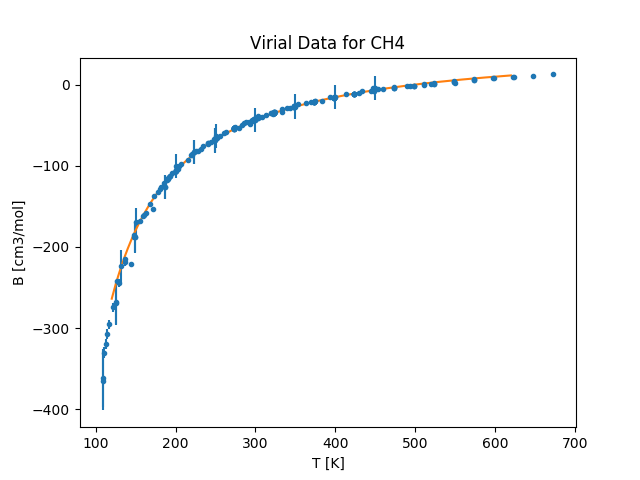

In [18]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for CH4")
ax.errorbar(all_CH4temps_flattened,all_CH4Bs_flattened, all_CH4Berrs_flattened, marker='.', ls='none')

tempRange = np.linspace(120, 620, 501)
Bcalculation = np.zeros(len(tempRange))

for ii, temp in enumerate(tempRange):
    Bcalculation[ii] = Bcalc(tempRange[ii], 3.892, 145.6, 0.0, 'Inf');

ax.plot(tempRange, Bcalculation)

ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()

<IPython.core.display.Javascript object>


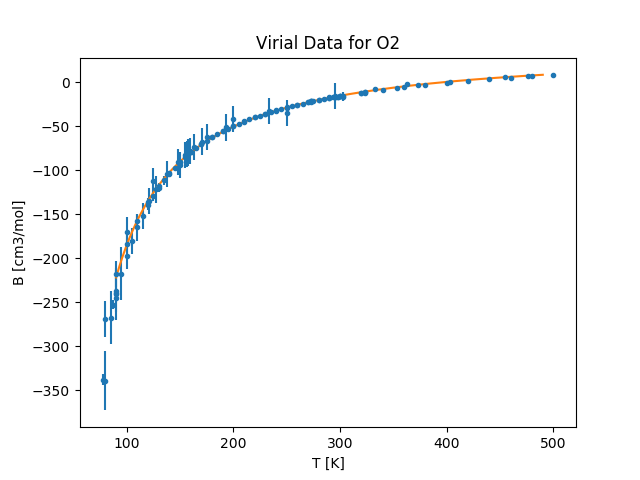

In [19]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for O2")
ax.errorbar(all_O2temps_flattened,all_O2Bs_flattened, all_O2Berrs_flattened, marker='.', ls='none')

tempRange = np.linspace(90, 490, 401)
Bcalculation = np.zeros(len(tempRange))

for ii, temp in enumerate(tempRange):
    Bcalculation[ii] = Bcalc(tempRange[ii], 3.548, 116.0, 0.0, 'Inf');

ax.plot(tempRange, Bcalculation)

ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()

<IPython.core.display.Javascript object>


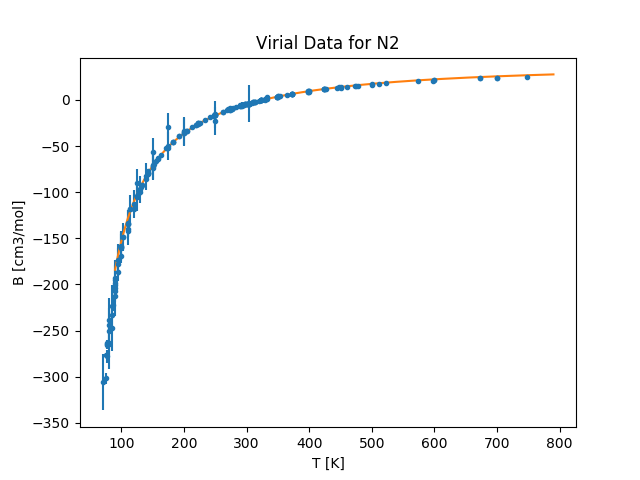

In [20]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for N2")
ax.errorbar(all_N2temps_flattened,all_N2Bs_flattened, all_N2Berrs_flattened, marker='.', ls='none')

tempRange = np.linspace(90, 790, 701)
Bcalculation = np.zeros(len(tempRange))

for ii, temp in enumerate(tempRange):
    Bcalculation[ii] = Bcalc(tempRange[ii], 3.731, 95.44, 0.0, 'Inf');

ax.plot(tempRange, Bcalculation)

ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()

<IPython.core.display.Javascript object>


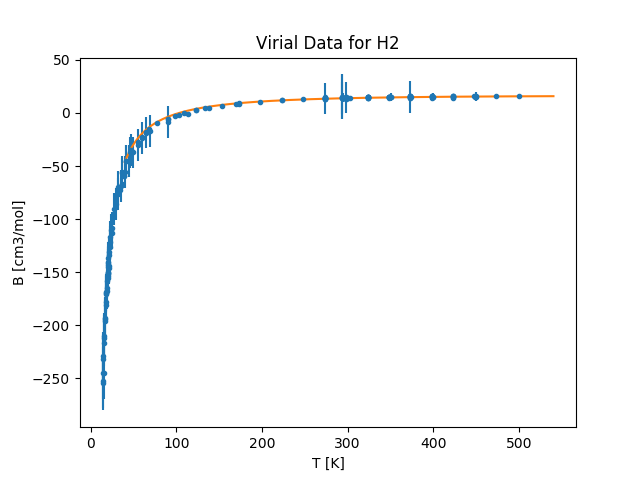

In [21]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for H2")
ax.errorbar(all_H2temps_flattened,all_H2Bs_flattened, all_H2Berrs_flattened, marker='.', ls='none')

tempRange = np.linspace(40, 540, 501)
Bcalculation = np.zeros(len(tempRange))

for ii, temp in enumerate(tempRange):
    Bcalculation[ii] = Bcalc(tempRange[ii], 2.889, 30.19, 0.0, 'Inf');

ax.plot(tempRange, Bcalculation)

ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()

<IPython.core.display.Javascript object>


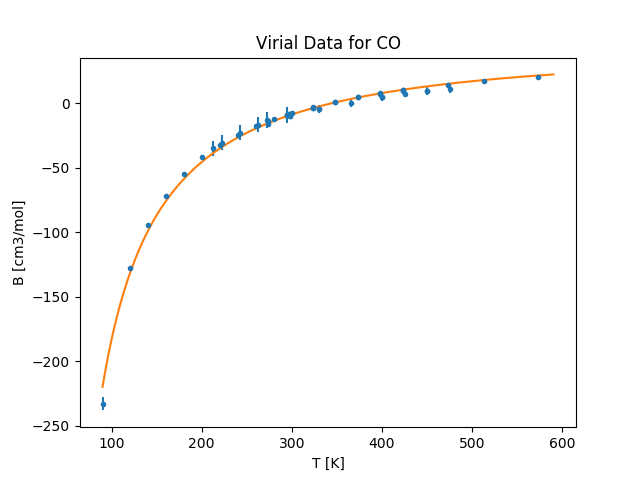

In [22]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for CO")
ax.errorbar(all_COtemps_flattened,all_COBs_flattened, all_COBerrs_flattened, marker='.', ls='none')

tempRange = np.linspace(90, 590, 501)
Bcalculation = np.zeros(len(tempRange))

for ii, temp in enumerate(tempRange):
    Bcalculation[ii] = Bcalc(tempRange[ii], 3.837, 100.7, 0.0, 'Inf');

ax.plot(tempRange, Bcalculation)

ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()

<IPython.core.display.Javascript object>


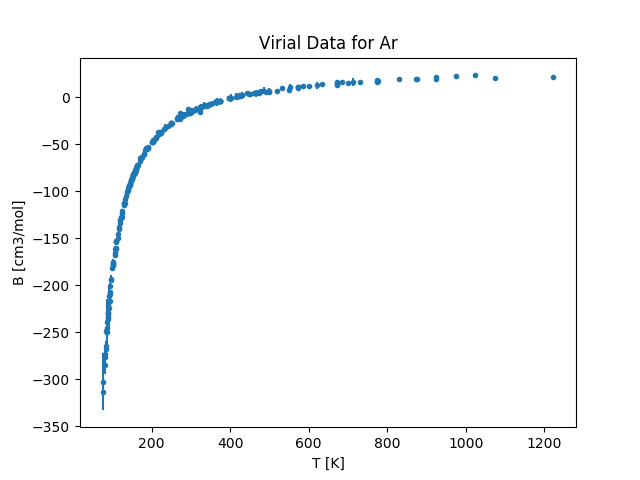

In [23]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for Ar")
ax.errorbar(all_Artemps_flattened,all_ArBs_flattened, all_ArBerrs_flattened, marker='.', ls='none')
ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()

<IPython.core.display.Javascript object>


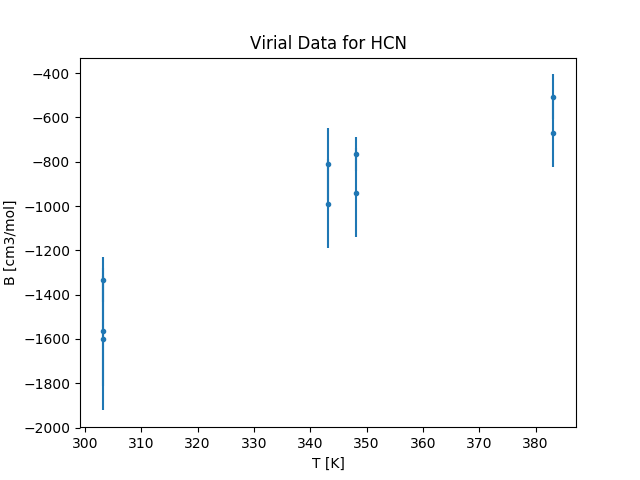

In [24]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for HCN")
ax.errorbar(all_HCNtemps_flattened,all_HCNBs_flattened, all_HCNBerrs_flattened, marker='.', ls='none')
ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()

<IPython.core.display.Javascript object>


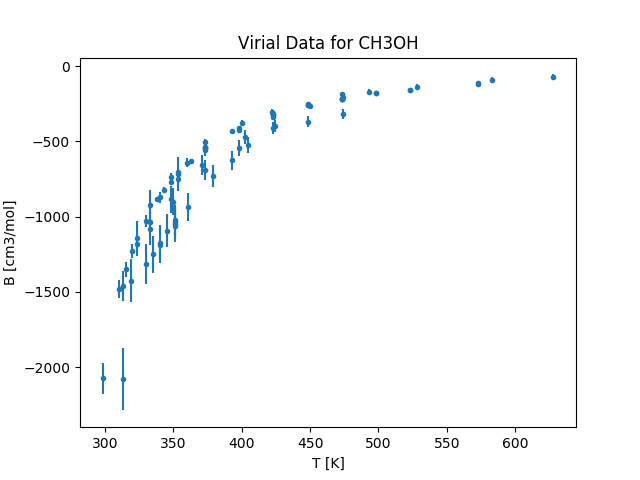

In [25]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for CH3OH")
ax.errorbar(all_CH3OHtemps_flattened,all_CH3OHBs_flattened, all_CH3OHBerrs_flattened, marker='.', ls='none')
ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()

<IPython.core.display.Javascript object>


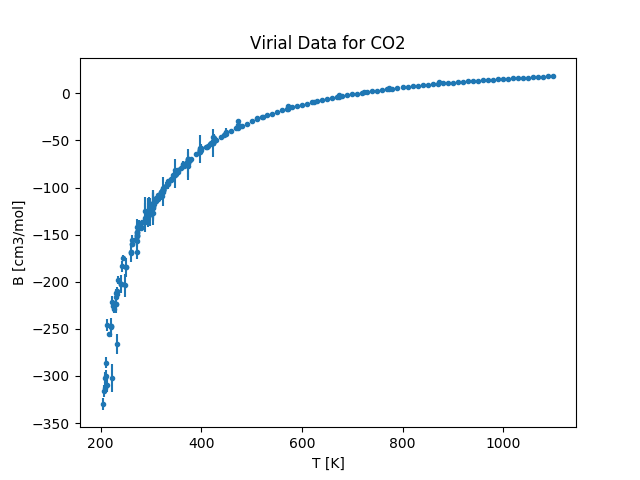

In [26]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for CO2")
ax.errorbar(all_CO2temps_flattened,all_CO2Bs_flattened, all_CO2Berrs_flattened, marker='.', ls='none')
ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()

<IPython.core.display.Javascript object>


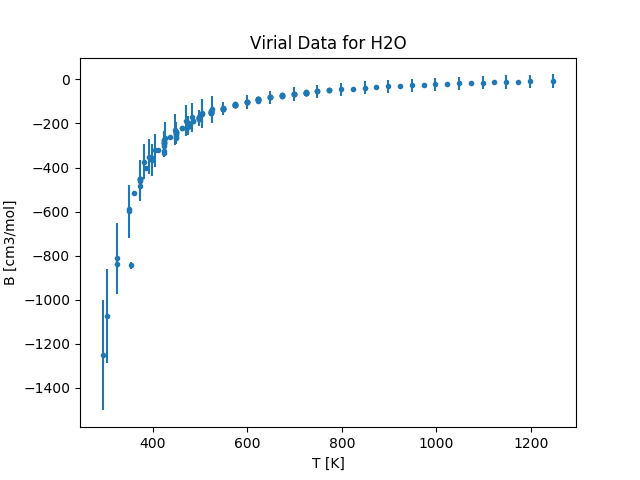

In [27]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for H2O")
ax.errorbar(all_H2Otemps_flattened,all_H2OBs_flattened, all_H2OBerrs_flattened, marker='.', ls='none')
ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()

<IPython.core.display.Javascript object>


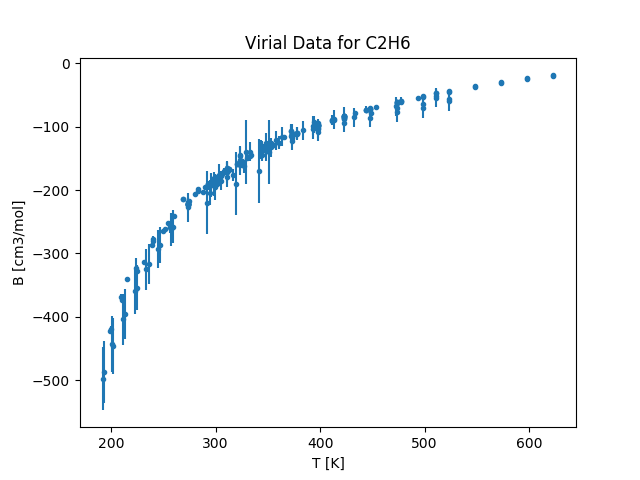

In [28]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for C2H6")
ax.errorbar(all_C2H6temps_flattened,all_C2H6Bs_flattened, all_C2H6Berrs_flattened, marker='.', ls='none')
ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()

<IPython.core.display.Javascript object>


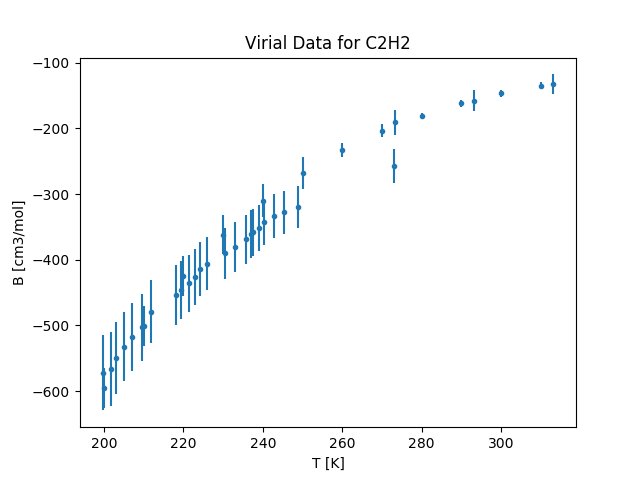

In [29]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for C2H2")
ax.errorbar(all_C2H2temps_flattened,all_C2H2Bs_flattened, all_C2H2Berrs_flattened, marker='.', ls='none')
ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()

<IPython.core.display.Javascript object>


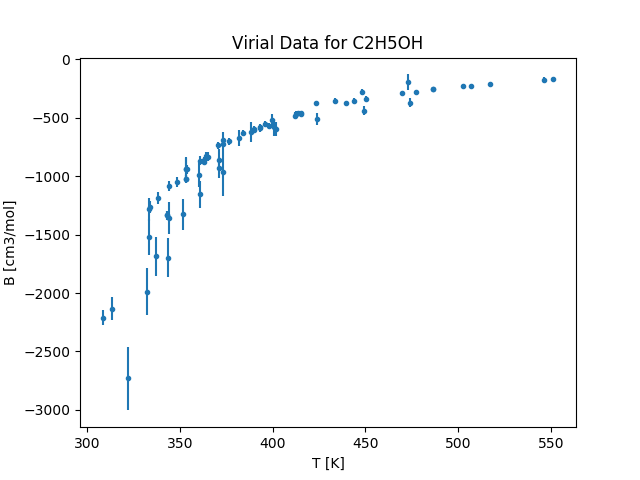

In [30]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for C2H5OH")
ax.errorbar(all_C2H5OHtemps_flattened,all_C2H5OHBs_flattened, all_C2H5OHBerrs_flattened, marker='.', ls='none')
ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()

<IPython.core.display.Javascript object>


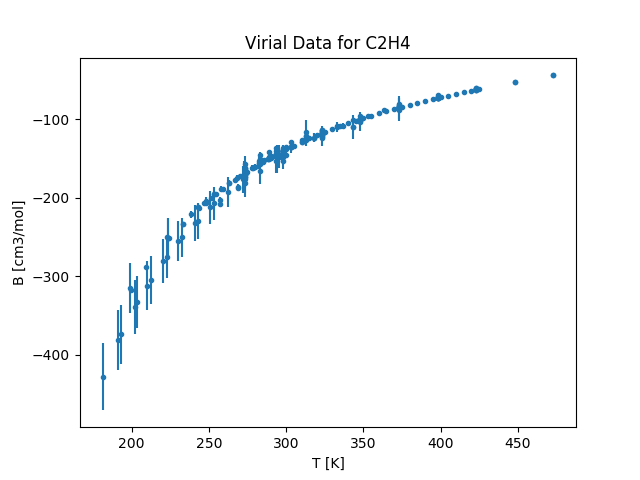

In [31]:
fig, ax = plt.subplots()
ax.set_title("Virial Data for C2H4")
ax.errorbar(all_C2H4temps_flattened,all_C2H4Bs_flattened, all_C2H4Berrs_flattened, marker='.', ls='none')
ax.set_xlabel('T [K]')
ax.set_ylabel('B [cm3/mol]')
plt.show()